<a href="https://colab.research.google.com/github/sunshineluyao/nns/blob/main/NNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 0: Setup

In [ ]:
pip install matplotlib numpy


# Part I Voting Power Multipliers

Notes: The voting power is calculated when the proposal is made, not when the ballot is cast.

## Part 1.1 Voting Power Multiplier $a$ of Dissolve Delay (Or Lock-up Duration)

In [ ]:
# @title NNS Voting Power Multiplier $a$ of dissolve delay (month)
dissolve_delay_month = -2 # @param {type:"number"}

def calculate_slope_intercept(f):
    # Define the points
    x1, y1 = 6, 1.06
    x2, y2 = 96, 2

    # Calculate the slope and intercept for the line segment between the points
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1

    def wrapper(x):
        return f(x, m, b)

    return wrapper

@calculate_slope_intercept
def multiplier_duration(x, m, b):
    # If x is a single number
    if np.isscalar(x):
        if x<0:
          return "the dissolve delay is out of range"
        elif x < 6:
            return 1
        elif x > 96:
            return 2
        else:
            return m * x + b
    else: # If x is an array
        y = m * x + b
        y[x < 6] = 1
        y[x > 96] = 2
        return y

y=multiplier_duration(dissolve_delay_month)
print(y)

the dissolve delay is out of range


<ipython-input-73-c64a4682848b>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


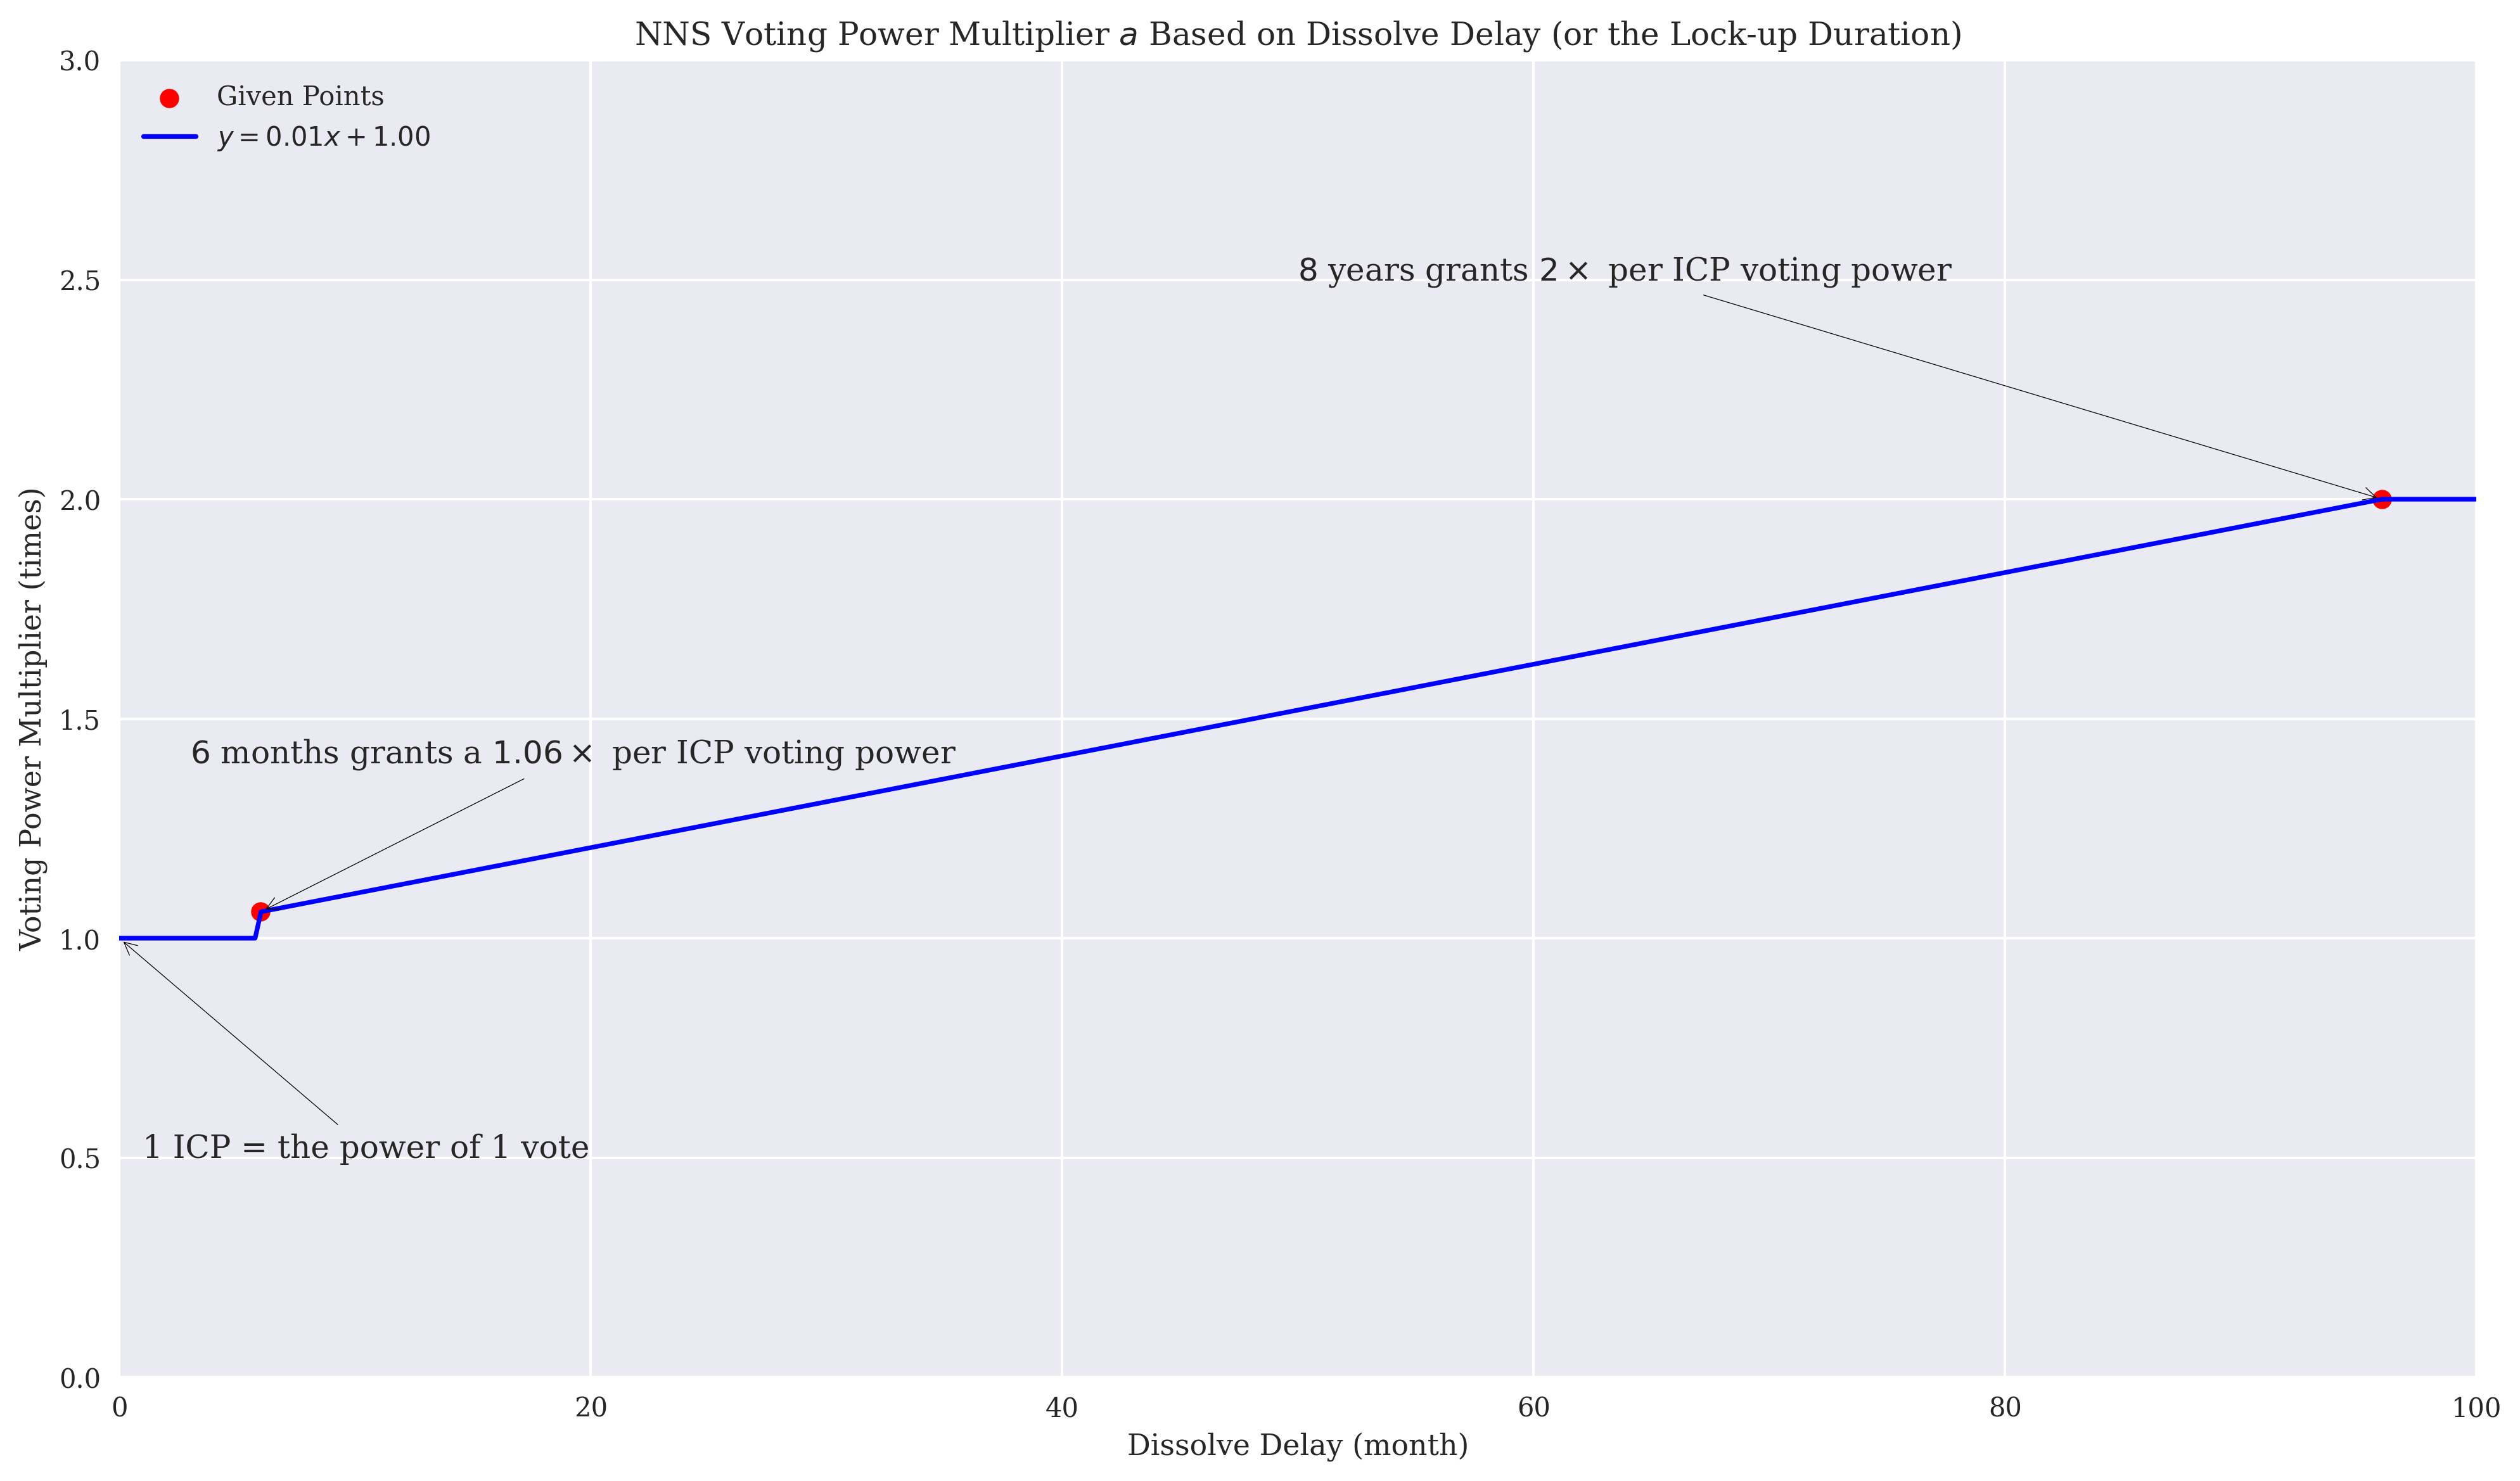

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Set the style to 'seaborn'
plt.style.use('seaborn')

# Define the aspect ratio and resolution
width = 16  # Width of the figure
height = 9  # Height of the figure
dpi = 300  # Dots per inch, for high resolution

#Set the font to 'Computer Modern'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern'] + plt.rcParams['font.serif']

# Create a new figure with the specified size
fig = plt.figure(figsize=(width, height), dpi=dpi)

def calculate_slope_intercept(f):
    # Define the points
    x1, y1 = 6, 1.06
    x2, y2 = 96, 2

    # Calculate the slope and intercept for the line segment between the points
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1

    def wrapper(x):
        return f(x, m, b)

    return wrapper

@calculate_slope_intercept
def multiplier_duration(x, m, b):
    # If x is a single number
    if np.isscalar(x):
        if x<0:
          return "the dissolve delay is out of range"
        elif x < 6:
            return 1
        elif x > 96:
            return 2
        else:
            return m * x + b
    else: # If x is an array
        y = m * x + b
        y[x < 6] = 1
        y[x > 96] = 2
        return y


# Generate x values from 0 to a bit beyond 16 for illustrative purposes
x_values = np.linspace(0, 100, 400)

# Plot the points
plt.scatter([x1, x2], [y1, y2], color='red', label="Given Points")

# Plot the polished linear function
plt.plot(x_values, multiplier_duration(x_values), '-b', label=f'$y = {m:.2f}x + {b:.2f}$')

# Annotate the point (0, 1)
plt.annotate('1 ICP = the power of 1 vote',
             xy=(0, 1),
             xytext=(1, 0.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

# Annotate the point (6, 1.06)
plt.annotate('$6$ months grants a $1.06\\times$ per ICP voting power',
             xy=(6, 1.06),
             xytext=(3, 1.4),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

# Annotate the point (16, 2)
plt.annotate('$8$ years grants $2 \\times$ per ICP voting power',
             xy=(96, 2),
             xytext=(50, 2.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

# Formatting
plt.title("NNS Voting Power Multiplier $a$ Based on Dissolve Delay (or the Lock-up Duration)")
plt.xlabel("Dissolve Delay (month)")
plt.ylabel("Voting Power Multiplier (times)")
plt.legend(loc="upper left")
plt.grid(True)
plt.ylim(0, 3)  # Setting y-axis limits for better visualization
plt.xlim(0, 100)  # Setting x-axis limits for better visualization

# Save the figure in high resolution
fig.savefig("multiplier_duration.png", dpi=dpi)
# Display the plot
plt.show()


## Part 1.2 Voting Power Multiplier $b$ of Age (length of time spent locked up without dissolving)

In [ ]:
# @title Voting Power Multiplier $b$ of Age (month)
age_month = 0 # @param {type:"number"}

def Multiplier_Age(x):
    if x < 0:
        return "the age is out of range"
    elif x > 48:
        return 1.25
    else:
        m = 0.25 / 48
        b = 1
        return m * x + b

y=Multiplier_Age(age_month)
print(y)

1.0


<ipython-input-48-919d92777719>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


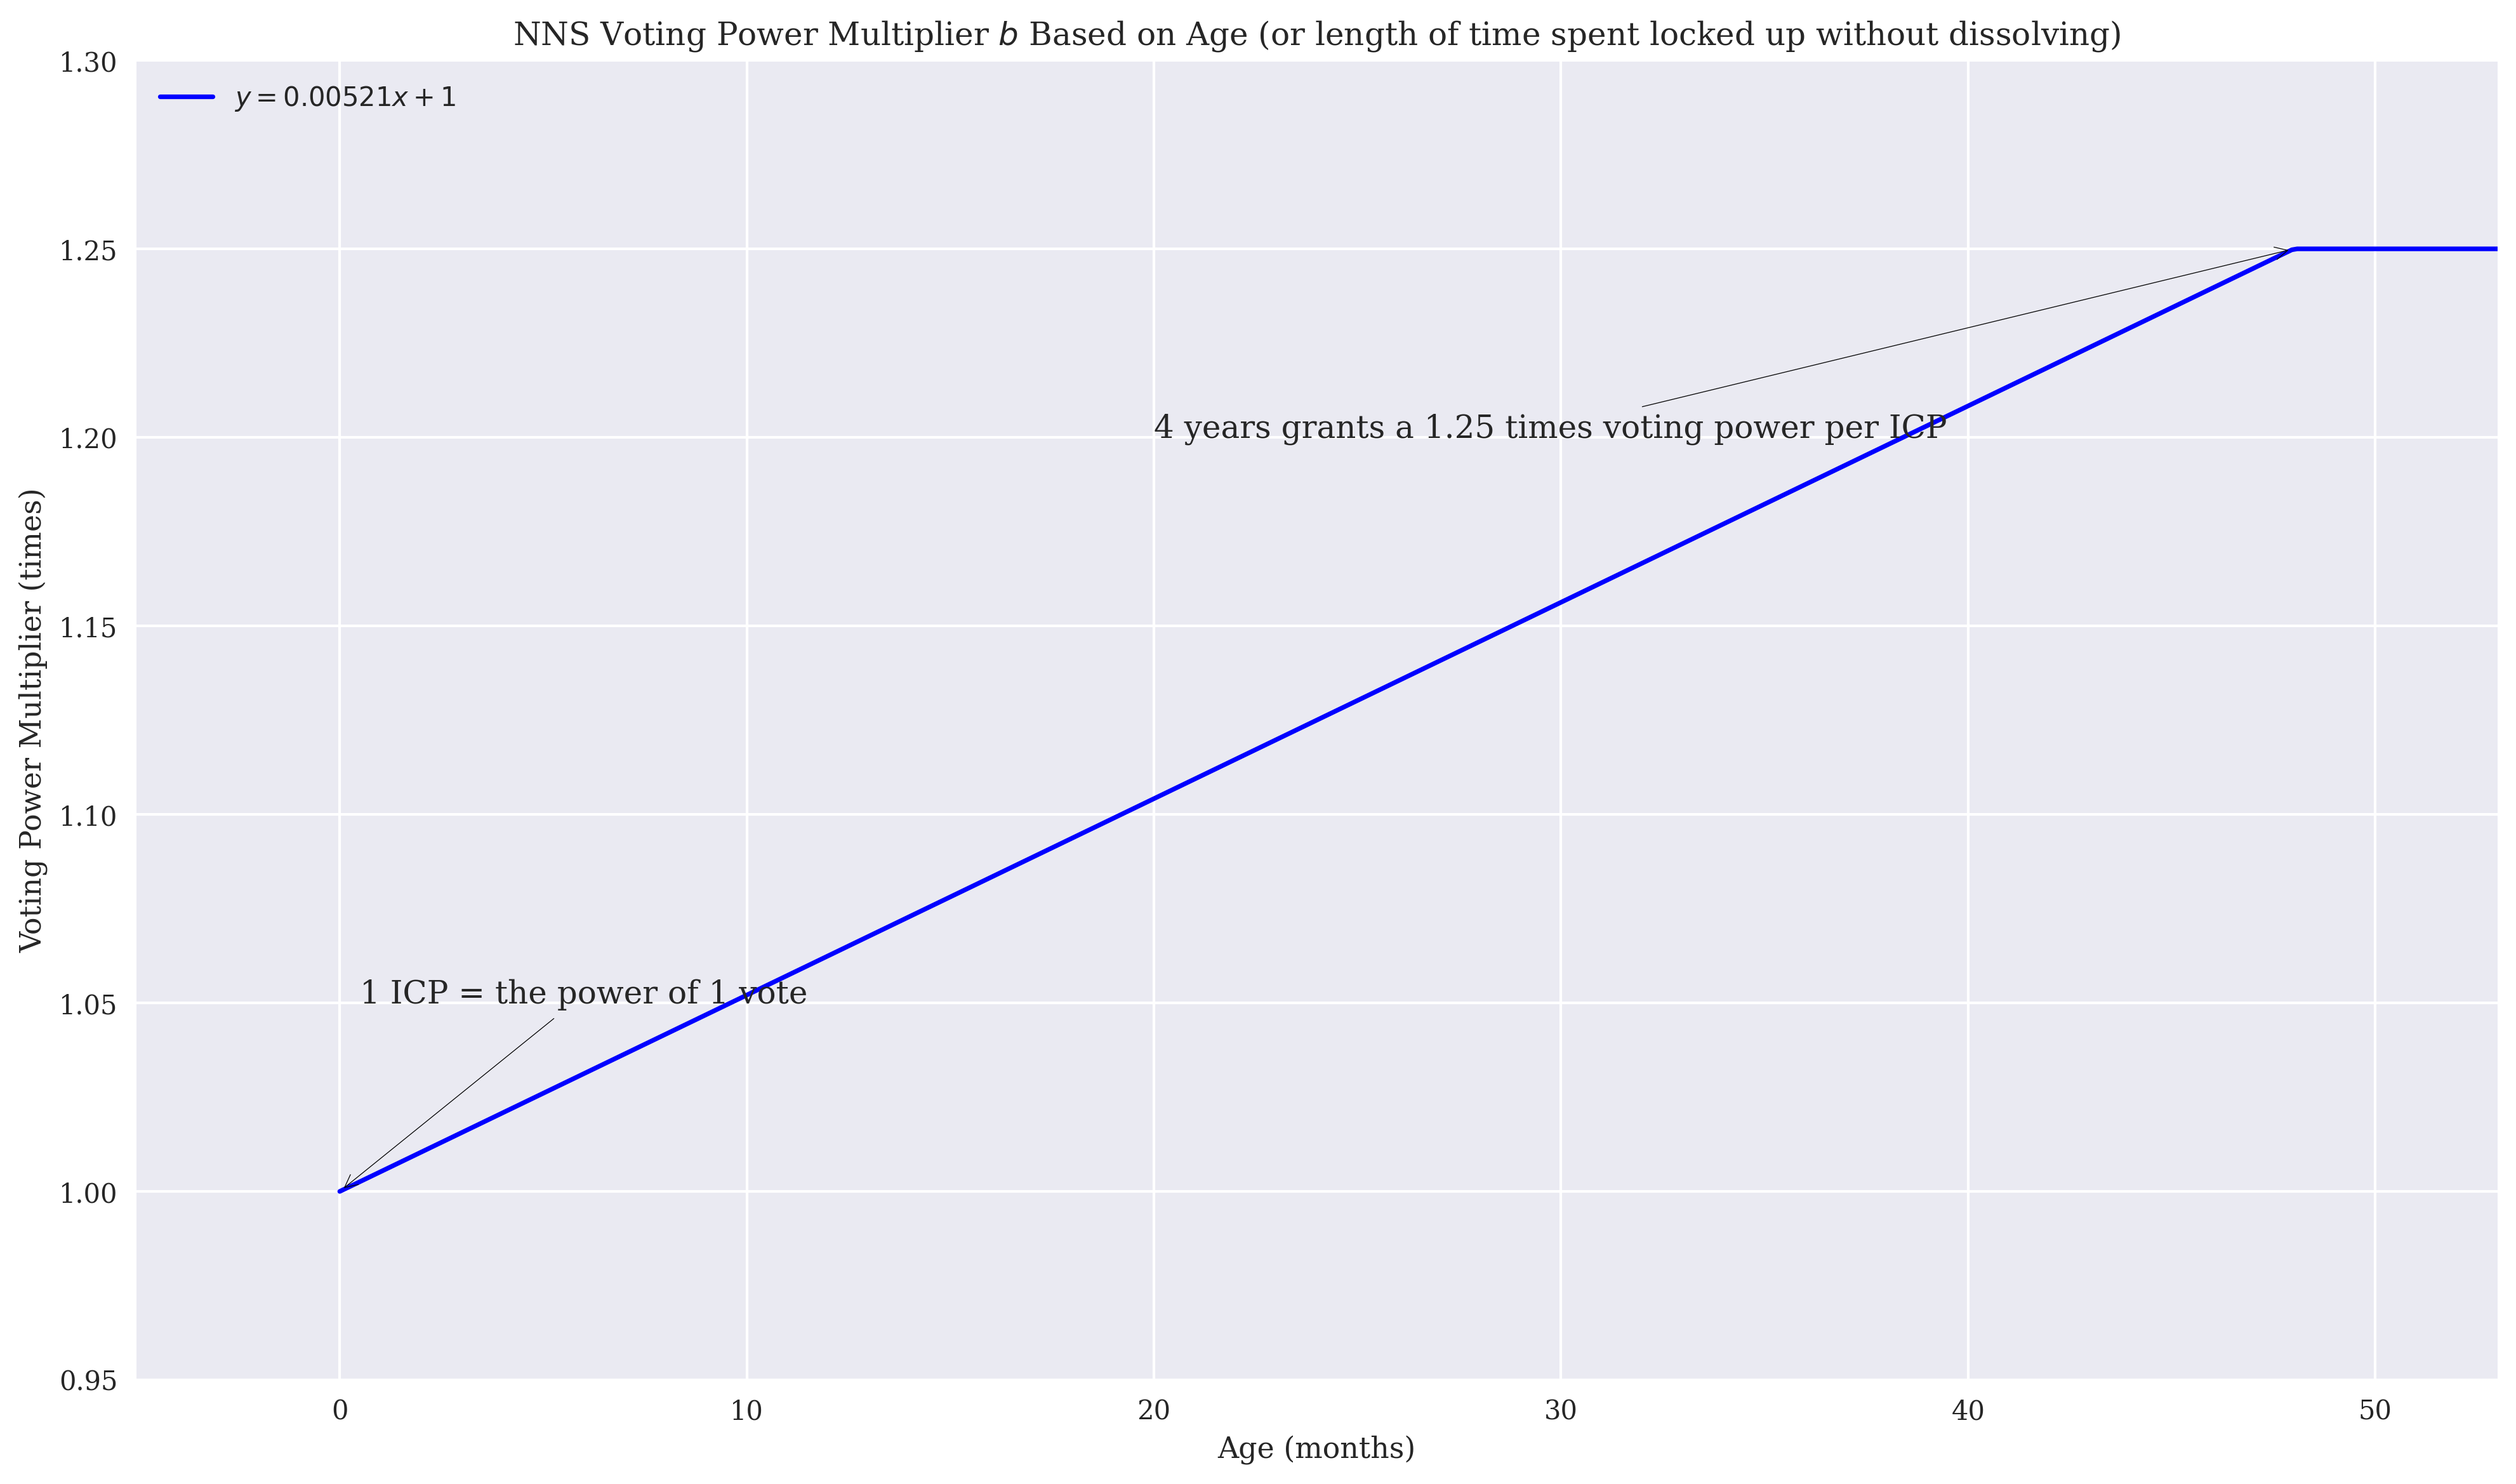

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Set the style to 'seaborn'
plt.style.use('seaborn')

# Define the aspect ratio and resolution
width = 16  # Width of the figure
height = 9  # Height of the figure
dpi = 300  # Dots per inch, for high resolution

#Set the font to 'Computer Modern'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern'] + plt.rcParams['font.serif']

# Create a new figure with the specified size
fig = plt.figure(figsize=(width, height), dpi=dpi)

import numpy as np
import matplotlib.pyplot as plt

# Define the function
def Multiplier_Age(x):
    if x < 0:
        return "the age is out of range"
    elif x > 48:
        return 1.25
    else:
        m = 0.25 / 48
        b = 1
        return m * x + b

# Generate x values from a bit below 0 to a bit beyond 48
x_values = np.linspace(0, 53, 400)

# Calculate the y-values using the function
y_values = [Multiplier_Age(x) for x in x_values]

# Plot the function
plt.plot(x_values, y_values, '-b', label=f'$y = {0.25/48:.5f}x + 1$')

# Annotate the point (0,0)
plt.annotate('1 ICP = the power of 1 vote',
             xy=(0, 1),
             xytext=(0.5, 1.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

# Annotate the point (48, 1.25)
plt.annotate('4 years grants a 1.25 times voting power per ICP',
             xy=(48, 1.25),
             xytext=(20, 1.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

# Formatting
plt.title("NNS Voting Power Multiplier $b$ Based on Age (or length of time spent locked up without dissolving)")
plt.xlabel("Age (months)")
plt.ylabel("Voting Power Multiplier (times)")
plt.legend(loc="upper left")
plt.grid(True)
plt.ylim(0.95, 1.3)  # Setting y-axis limits for better visualization
plt.xlim(-5, 53)  # Setting x-axis limits for better visualization

# Save the figure in high resolution
fig.savefig("multiplier_age.png", dpi=dpi)
# Display the plot
plt.show()


In [ ]:
def calculate_slope_intercept(f):
    # Define the points
    x1, y1 = 6, 1.06
    x2, y2 = 96, 2

    # Calculate the slope and intercept for the line segment between the points
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1

    def wrapper(x):
        return f(x, m, b)

    return wrapper

@calculate_slope_intercept
def multiplier_duration(x, m, b):
    # If x is a single number
    if np.isscalar(x):
        if x<0:
          return "the dissolve delay is out of range"
        elif x < 6:
            return 1
        elif x > 96:
            return 2
        else:
            return m * x + b
    else: # If x is an array
        y = m * x + b
        y[x < 6] = 1
        y[x > 96] = 2
        return y


In [ ]:
def log_call(func):
    def wrapper(x):
        print(f"{func.__name__} called with argument: {x}")
        return func(x)
    return wrapper

@log_call
def Multiplier_Age(x):
    if x < 0:
        return "the age is out of range"
    elif x > 48:
        return 1.25
    else:
        m = 0.25 / 48
        b = 1
        return m * x + b

## Part 1.3. Voting Power Multiplier Combined

In [ ]:
def combined_multiplier(x_age, x_duration):
    # Ensure age is always less than duration
    if x_age > x_duration:
        return "Error: age shall be smaller than the dissolve delay"

    age_multiplier = Multiplier_Age(x_age)
    duration_multiplier = multiplier_duration(x_duration)

    if isinstance(age_multiplier, str) or isinstance(duration_multiplier, str):
        # Handle cases where one or both multipliers are out of range or other non-numeric values
        return "Input out of range"
    else:
        return age_multiplier * duration_multiplier

In [ ]:
# @title Voting Power Multiplier Combined
dissolve_delay_month = 0 # @param {type:"number"}
age = 48 # @param {type:"number"}

m_duration = multiplier_duration(dissolve_delay_month)
m_age = Multiplier_Age(age)
m =combined_multiplier(age, dissolve_delay_month)
print(f'The voting power multiplier of dissolve delay {dissolve_delay_month} month is {m_duration}')
print(f'The voting power multiplier of age {age} month is {m_age}')
print(f'The voting power multiplier of combined multiplier of {dissolve_delay_month} and {age} month is {m}')


The voting power multiplier of dissolve delay 0 month is 1
The voting power multiplier of age 48 month is 1.25
The voting power multiplier of combined multiplier of 0 and 48 month is Error: age shall be smaller than the dissolve delay


<ipython-input-95-8bb0d65c5ac2>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


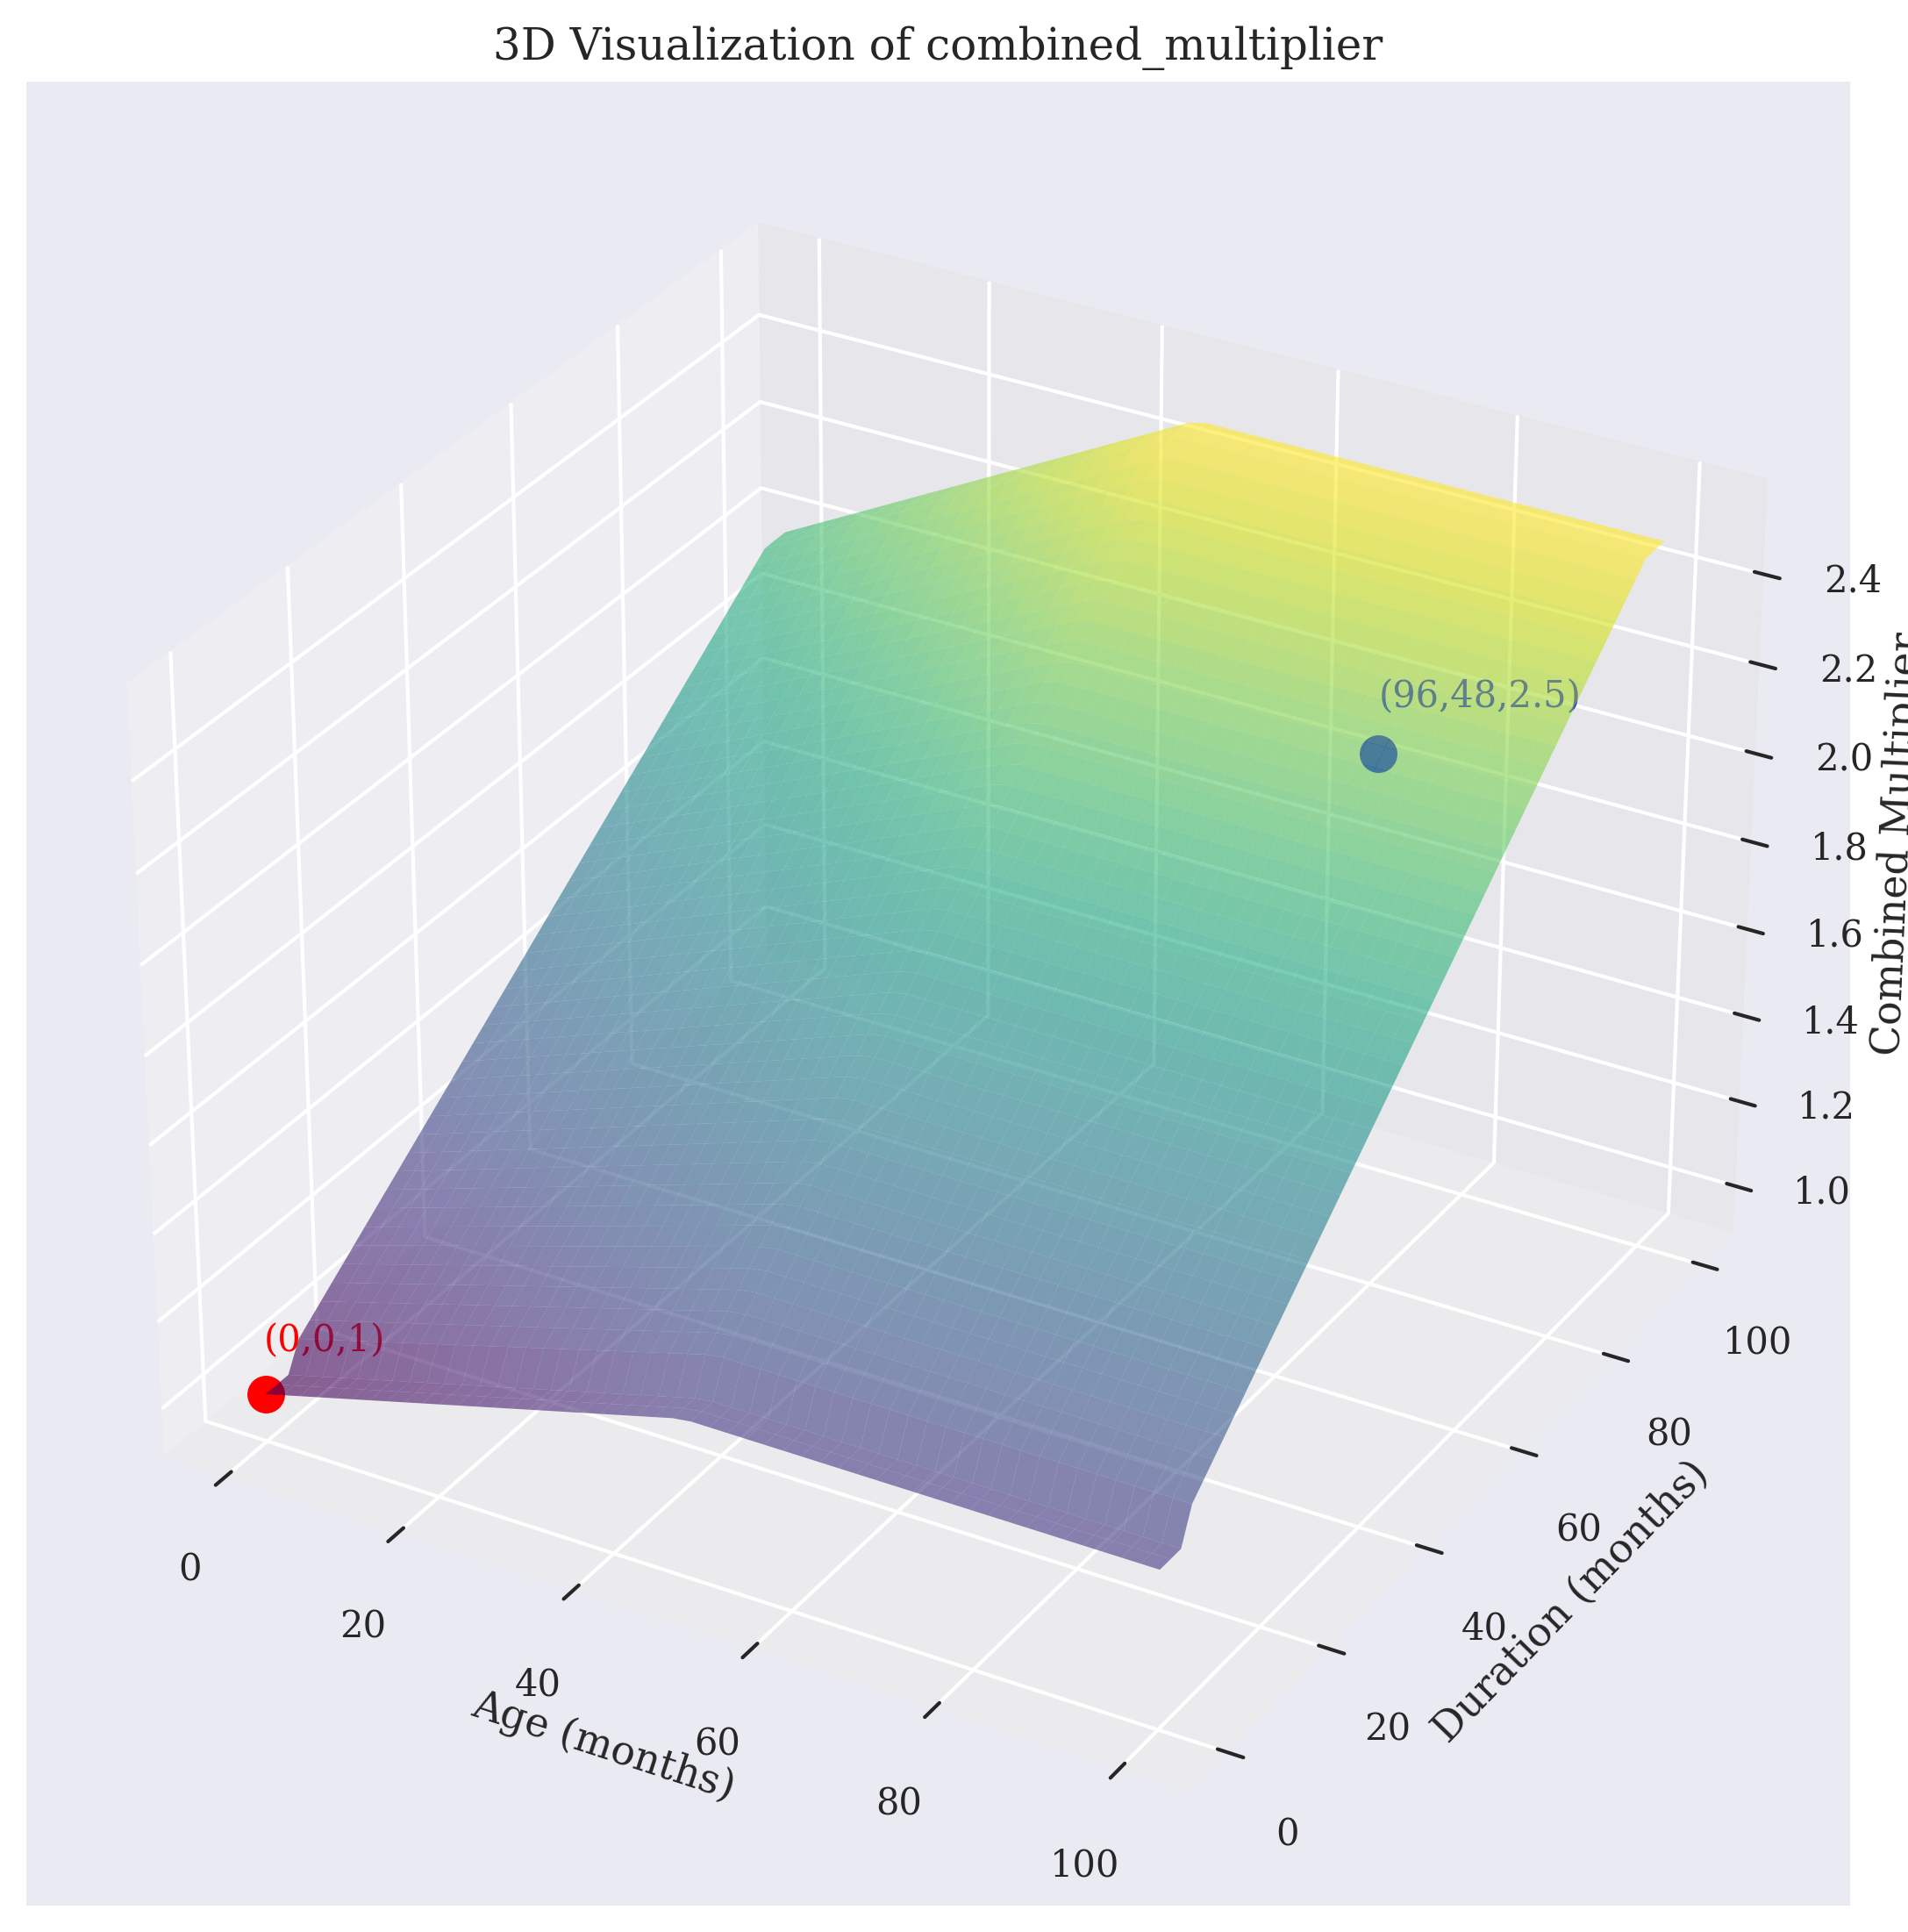

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set the style to 'seaborn'
plt.style.use('seaborn')

# Define the aspect ratio and resolution
width = 16  # Width of the figure
height = 9  # Height of the figure
dpi = 300  # Dots per inch, for high resolution

#Set the font to 'Computer Modern'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern'] + plt.rcParams['font.serif']

# Create a new figure with the specified size
fig = plt.figure(figsize=(width, height), dpi=dpi)


# Define the functions if not already defined
# ... your previously defined Multiplier_Age and multiplier_duration ...


def combined_multiplier(x_age, x_duration):
    age_multiplier = Multiplier_Age(x_age)
    duration_multiplier = multiplier_duration(x_duration)

    if isinstance(age_multiplier, str) or isinstance(duration_multiplier, str):
        return np.nan  # Return NaN for out of range values
    else:
        return age_multiplier * duration_multiplier

# Create grid of values
x_age = np.linspace(0, 100, 50)  # e.g., 0 to 100 months for age
x_duration = np.linspace(0, 100, 50)  # e.g., 0 to 100 months for duration
X_age, X_duration = np.meshgrid(x_age, x_duration)
Z = np.array([combined_multiplier(a, d) for a, d in zip(np.ravel(X_age), np.ravel(X_duration))])
Z = Z.reshape(X_age.shape)

# Plotting
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X_age, X_duration, Z, cmap='viridis', edgecolor='none', alpha=0.6)

# Annotate points
ax.scatter(0, 0, 1, color='red', s=100)
ax.text(0, 0, 1.1, "(0,0,1)", color='red')
ax.scatter(96, 48, 2.5, color='blue', s=100)
ax.text(96, 48, 2.6, "(96,48,2.5)", color='blue')

ax.set_xlabel('Age (months)')
ax.set_ylabel('Duration (months)')
ax.set_zlabel('Combined Multiplier')
ax.set_title('3D Visualization of combined_multiplier')

# Save the figure in high resolution
fig.savefig("multiplier_combined.png", dpi=dpi)
# Display the plot
plt.show()

<ipython-input-96-37a897dae887>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


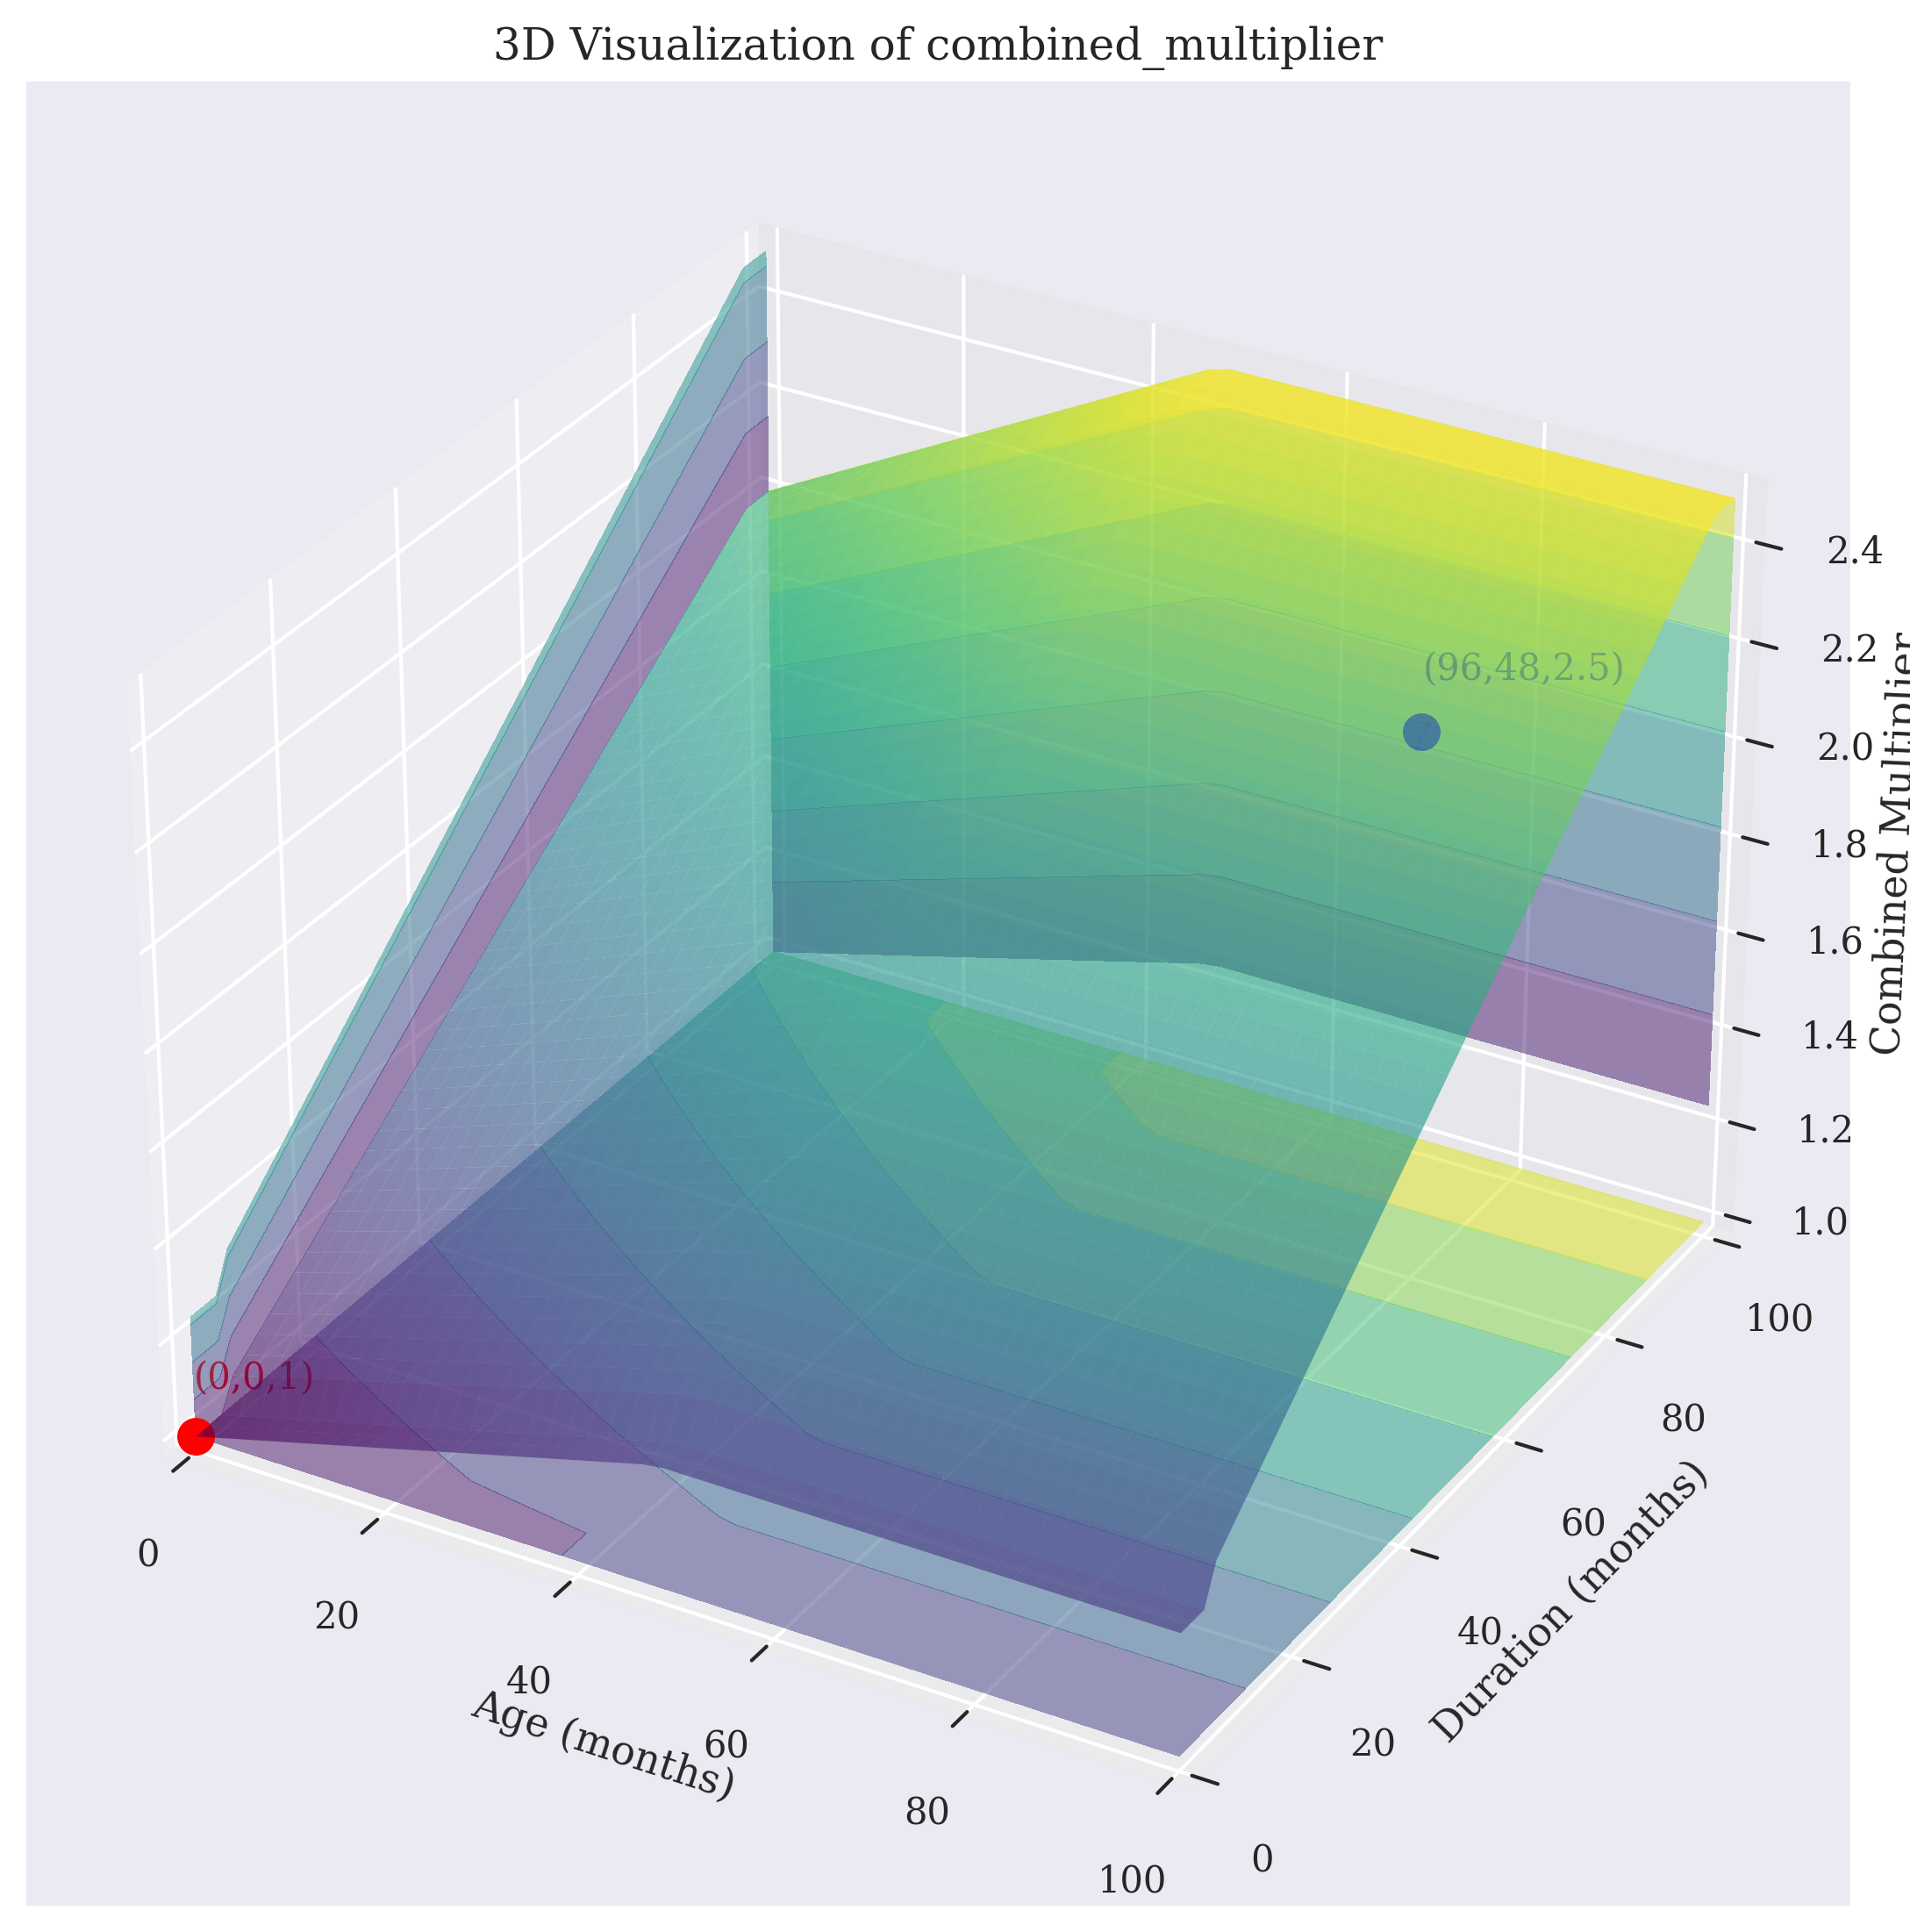

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set the style to 'seaborn'
plt.style.use('seaborn')

# Define the aspect ratio and resolution
width = 16
height = 9
dpi = 300

# Set the font to 'Computer Modern'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern'] + plt.rcParams['font.serif']

# Create a new figure with the specified size
fig = plt.figure(figsize=(width, height), dpi=dpi)

# ... your previously defined Multiplier_Age and multiplier_duration ...

# Plotting
ax = fig.add_subplot(111, projection='3d')

# Create grid of values
x_age = np.linspace(0, 100, 50)
x_duration = np.linspace(0, 100, 50)
X_age, X_duration = np.meshgrid(x_age, x_duration)
Z = np.array([combined_multiplier(a, d) for a, d in zip(np.ravel(X_age), np.ravel(X_duration))])
Z = Z.reshape(X_age.shape)

# Plot the surface
surf = ax.plot_surface(X_age, X_duration, Z, cmap='viridis', edgecolor='none', alpha=0.6, rstride=1, cstride=1)

# Add contour plots
cset = ax.contourf(X_age, X_duration, Z, zdir='z', offset=np.min(Z), cmap='viridis', alpha=0.5)
cset = ax.contourf(X_age, X_duration, Z, zdir='x', offset=np.min(X_age), cmap='viridis', alpha=0.5)
cset = ax.contourf(X_age, X_duration, Z, zdir='y', offset=np.max(X_duration), cmap='viridis', alpha=0.5)

# Annotate points
ax.scatter(0, 0, 1, color='red', s=100)
ax.text(0, 0, 1.1, "(0,0,1)", color='red')
ax.scatter(96, 48, 2.5, color='blue', s=100)
ax.text(96, 48, 2.6, "(96,48,2.5)", color='blue')

# Labels and Title
ax.set_xlabel('Age (months)')
ax.set_ylabel('Duration (months)')
ax.set_zlabel('Combined Multiplier')
ax.set_title('3D Visualization of combined_multiplier')

# Setting axis limits for better visualization
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_zlim(np.min(Z), np.max(Z))

# Save the figure in high resolution
fig.savefig("multiplier_combined.png", dpi=dpi)

# Display the plot
plt.show()


<ipython-input-101-06d98aed7c5d>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


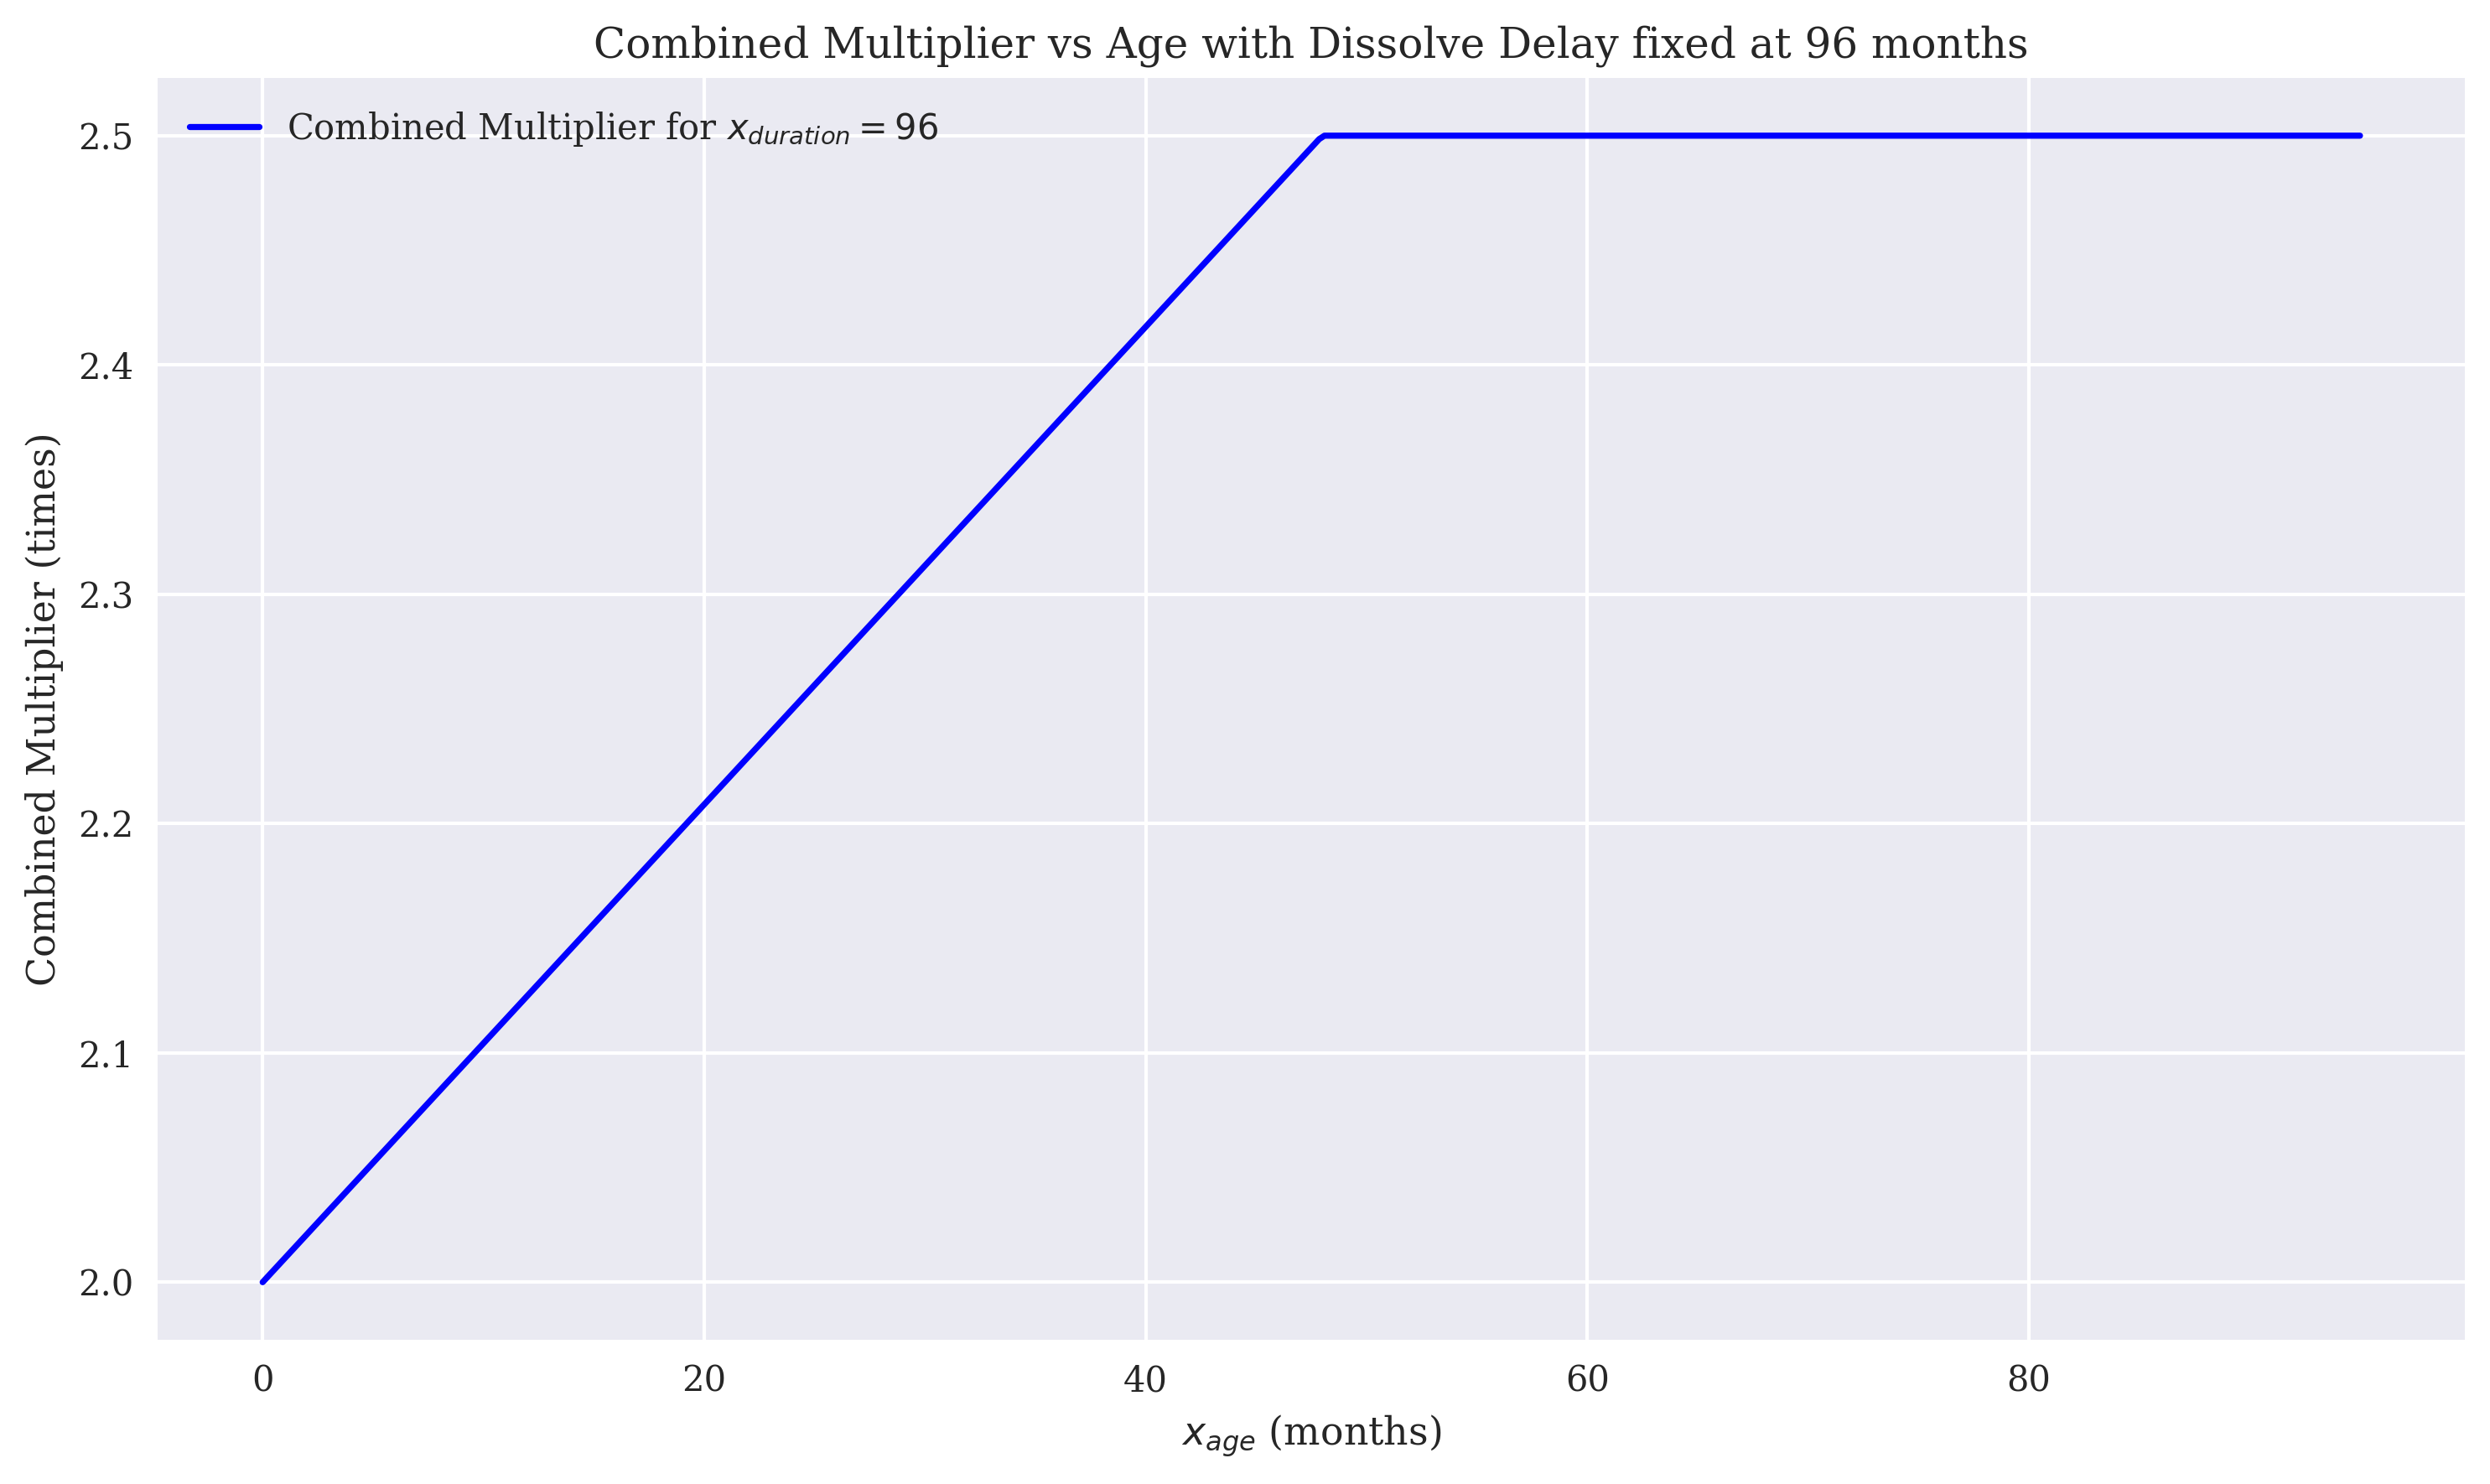

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the style to 'seaborn'
plt.style.use('seaborn')

# Define the aspect ratio and resolution
width = 10  # Width of the figure
height = 6  # Height of the figure
dpi = 300  # Dots per inch, for standard resolution

# Set the font to 'Computer Modern'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern'] + plt.rcParams['font.serif']

# Create a new figure with the specified size
fig, ax = plt.subplots(figsize=(width, height), dpi=dpi)

# Values for x_age from 0 to 96
x_age_values = np.linspace(0, 95, 400)  # excluding 96 to ensure x_age < x_duration

# Compute combined multipliers
y_values = [combined_multiplier(x, 96) for x in x_age_values]

# Plot the curve
ax.plot(x_age_values, y_values, '-b', label='Combined Multiplier for $x_{duration} = 96$')

# Formatting
ax.set_title("Combined Multiplier vs Age with Dissolve Delay fixed at 96 months")
ax.set_xlabel("$x_{age}$ (months)")
ax.set_ylabel("Combined Multiplier (times)")
ax.legend()
ax.grid(True)

# Display the plot
plt.tight_layout()
# Save the figure in high resolution
fig.savefig("multiplier_age.png", dpi=dpi)
# Display the plot
plt.show()



<ipython-input-113-e425fd977235>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


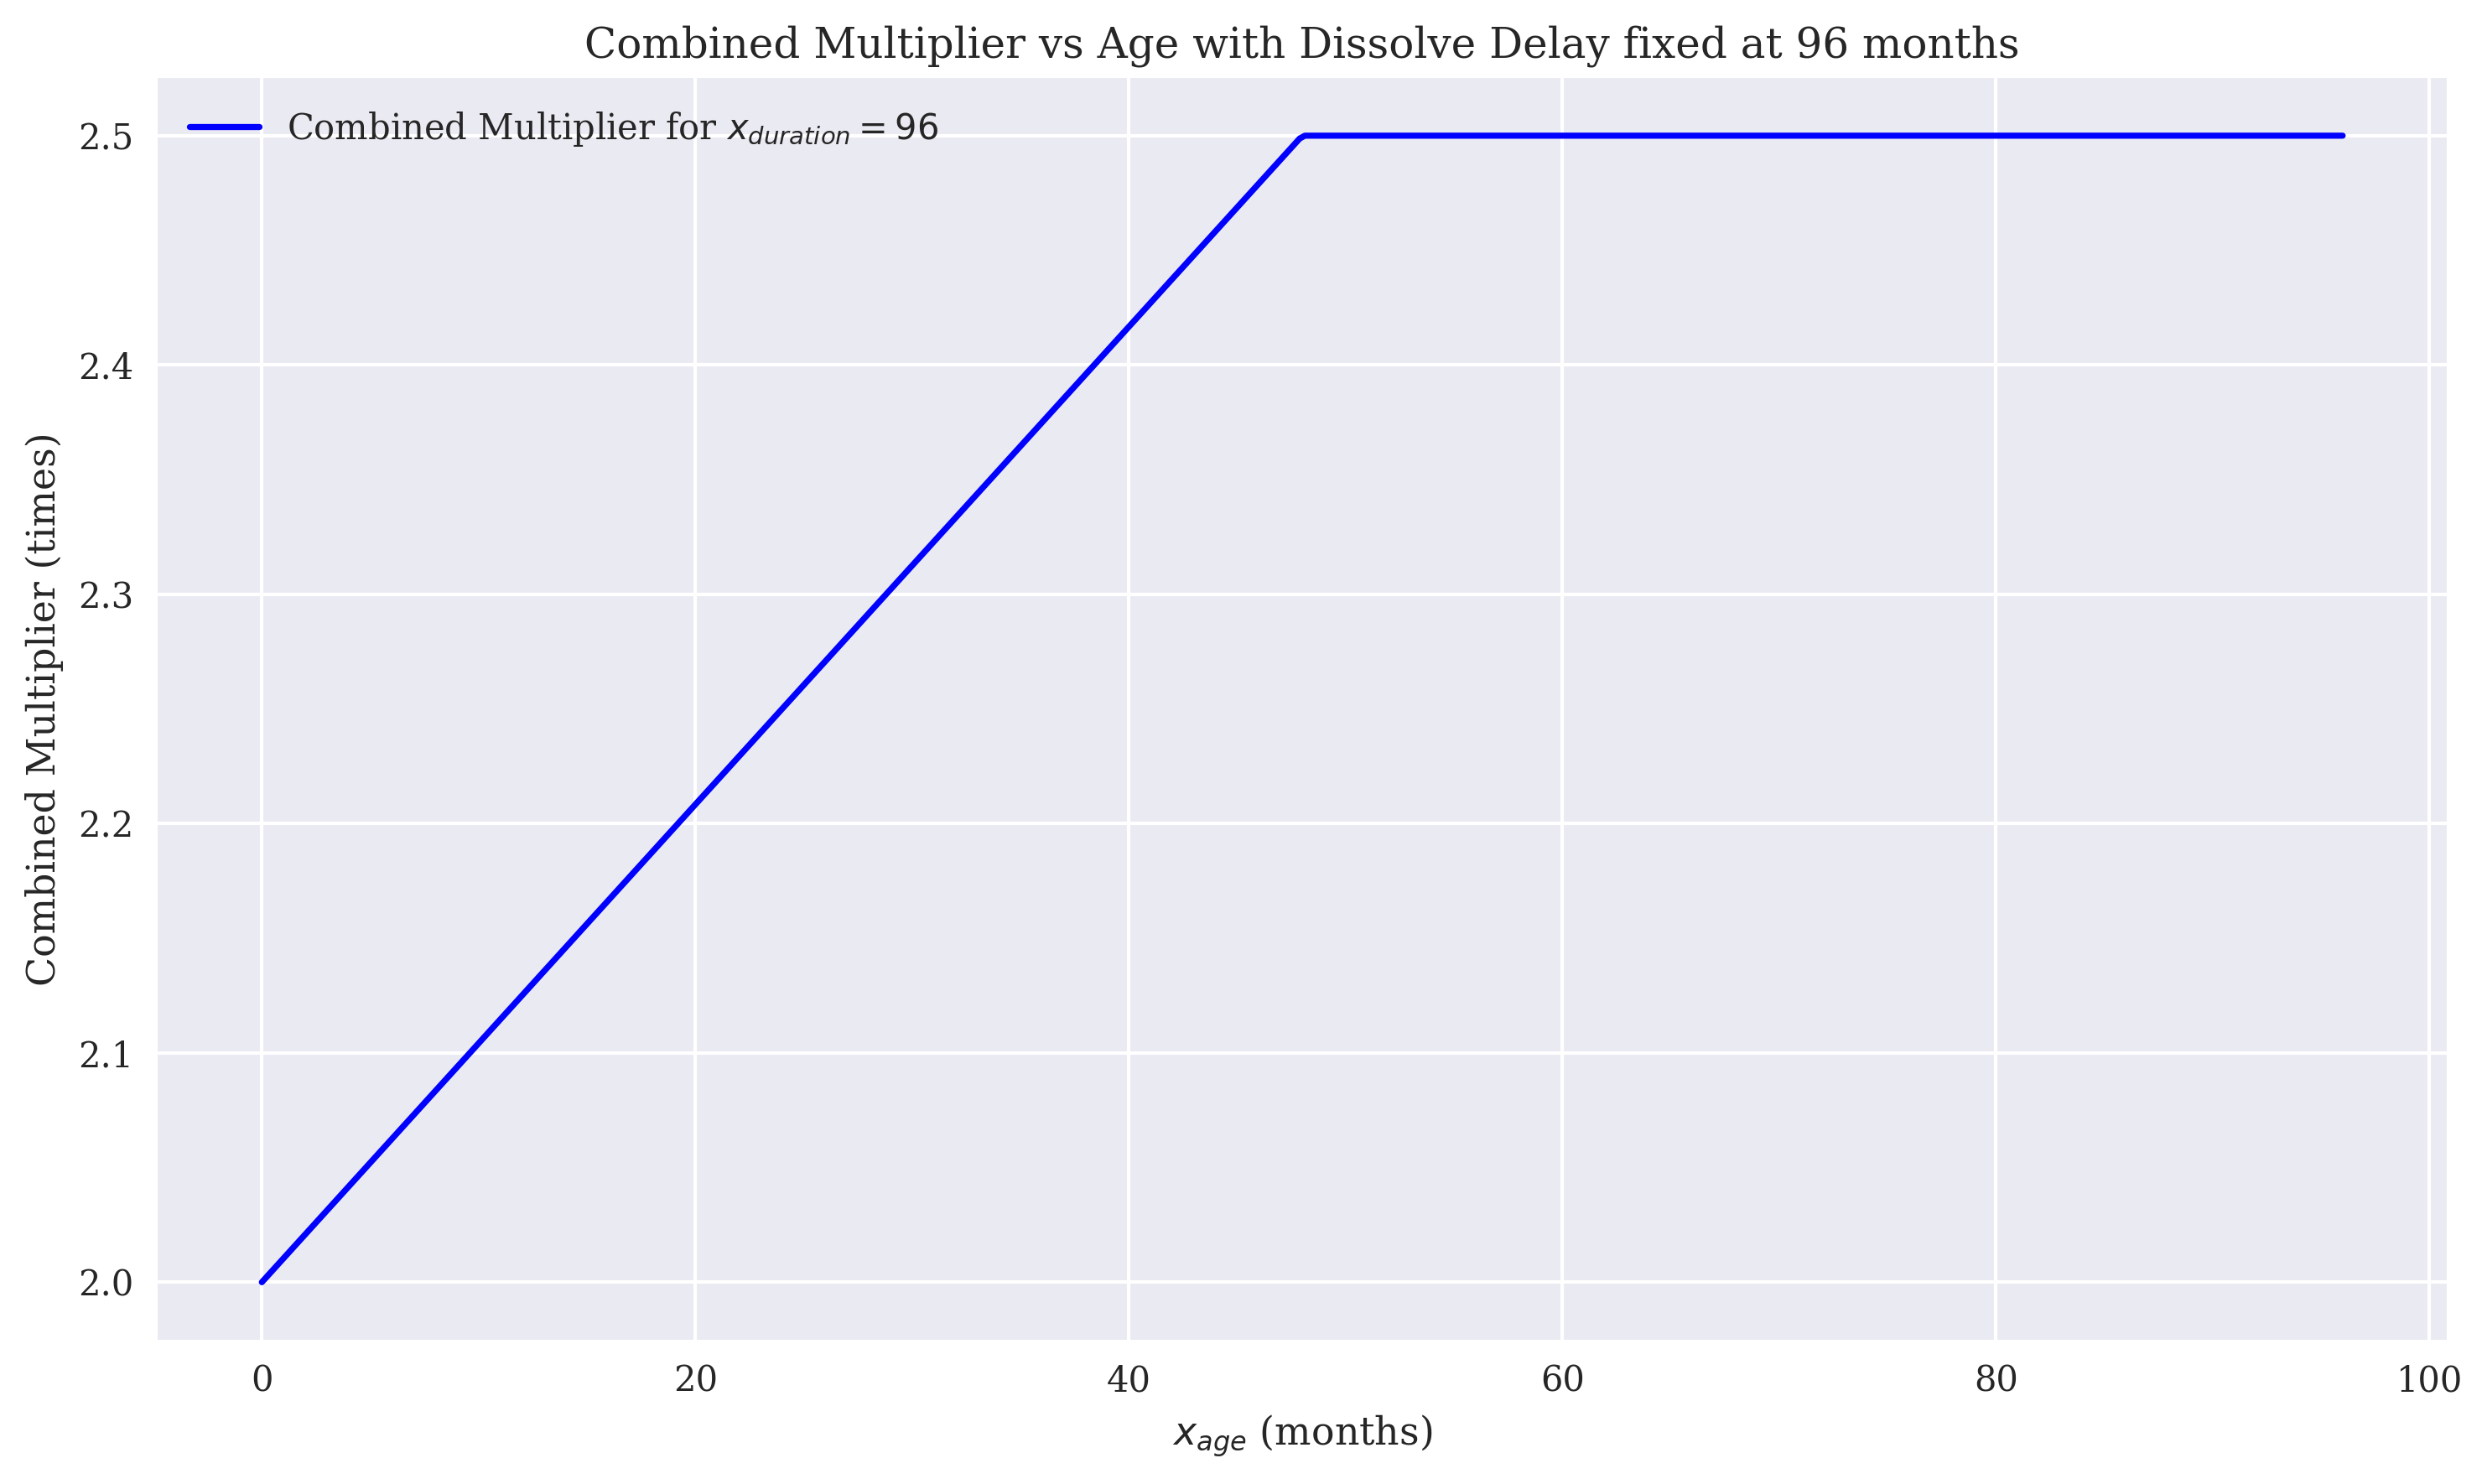

In [ ]:
# @title The Voting Power Multiplier Changes with Age Given A Choosen Dissolve Delay (month)
dissolve_delay_month = 96 # @param {type:"number"}
month = dissolve_delay_month

import numpy as np
import matplotlib.pyplot as plt

# Set the style to 'seaborn'
plt.style.use('seaborn')

# Define the aspect ratio and resolution
width = 10  # Width of the figure
height = 6  # Height of the figure
dpi = 300  # Dots per inch, for standard resolution

# Set the font to 'Computer Modern'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern'] + plt.rcParams['font.serif']

# Create a new figure with the specified size
fig, ax = plt.subplots(figsize=(width, height), dpi=dpi)

# Values for x_age from 0 to the duration of dissolve delay
x_age_values = np.linspace(0, month, 400)  # ensure x_age < x_duration

# Compute combined multipliers
y_values = [combined_multiplier(x, month) for x in x_age_values]

# Plot the curve
ax.plot(x_age_values, y_values, '-b', label=f"Combined Multiplier for $x_{{duration}} = {month}$")

# Formatting
ax.set_title(f"Combined Multiplier vs Age with Dissolve Delay fixed at {month} months")
ax.set_xlabel("$x_{age}$ (months)")
ax.set_ylabel("Combined Multiplier (times)")
ax.legend()
ax.grid(True)

# Display the plot
plt.tight_layout()
# Save the figure in high resolution
fig.savefig("multiplier_age.png", dpi=dpi)
# Display the plot
plt.show()



# Part II Voting Rewards

## Part 2.1. Total Rewards

In [115]:
from datetime import datetime

def years_difference(G, T):
    # Calculate the difference in years
    t = T.year - G.year

    # If the month and day of T is before that of G, subtract 1 from the difference
    if (T.month, T.day) < (G.month, G.day):
        t -= 1

    return t

# Example usage:
G = datetime(2020, 12, 18)
T = datetime.now()  # Current datetime
print(years_difference(G, T))

2


In [121]:
# @title The year since genesis
year = 2023 # @param {type:"integer"}
month = 9 # @param {type:"integer"}
date = 14 # @param {type:"integer"}

from datetime import datetime

def years_difference(G, T):
    # Calculate the difference in years
    t = T.year - G.year

    # If the month and day of T is before that of G, subtract 1 from the difference
    if (T.month, T.day) < (G.month, G.day):
        t -= 1

    return t

# Example usage:
G = datetime(2020, 12, 18) # G is the Genesis of the Internet Computer
T = datetime(year,month,date)  # Current datetime
t=years_difference(G, T)
print(f"the year difference since the Internet Computer Gensis is {t}")


the year difference since the Internet Computer Gensis is 2


In [132]:
# @title Yearly Total Reward in Inflation Rate
year_since_genesis = 0 # @param {type:"number"}

def R(t):
    # Check if the input is an integer and at least 1
    if not isinstance(t, int) or t < 0:
        return "Error: the input must be an integer at least as large as 1"

    # If t is larger than 8, return 0.05
    if t > 8:
        return 0.05

    # Otherwise, compute the function value
    return 0.05 + 0.05 * ((8 - t) / 8) ** 2

# Example usage:
print(R(year_since_genesis))  # This will print the value of R(t) when t=4


0.1


<ipython-input-139-ac66dfdf6fd4>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


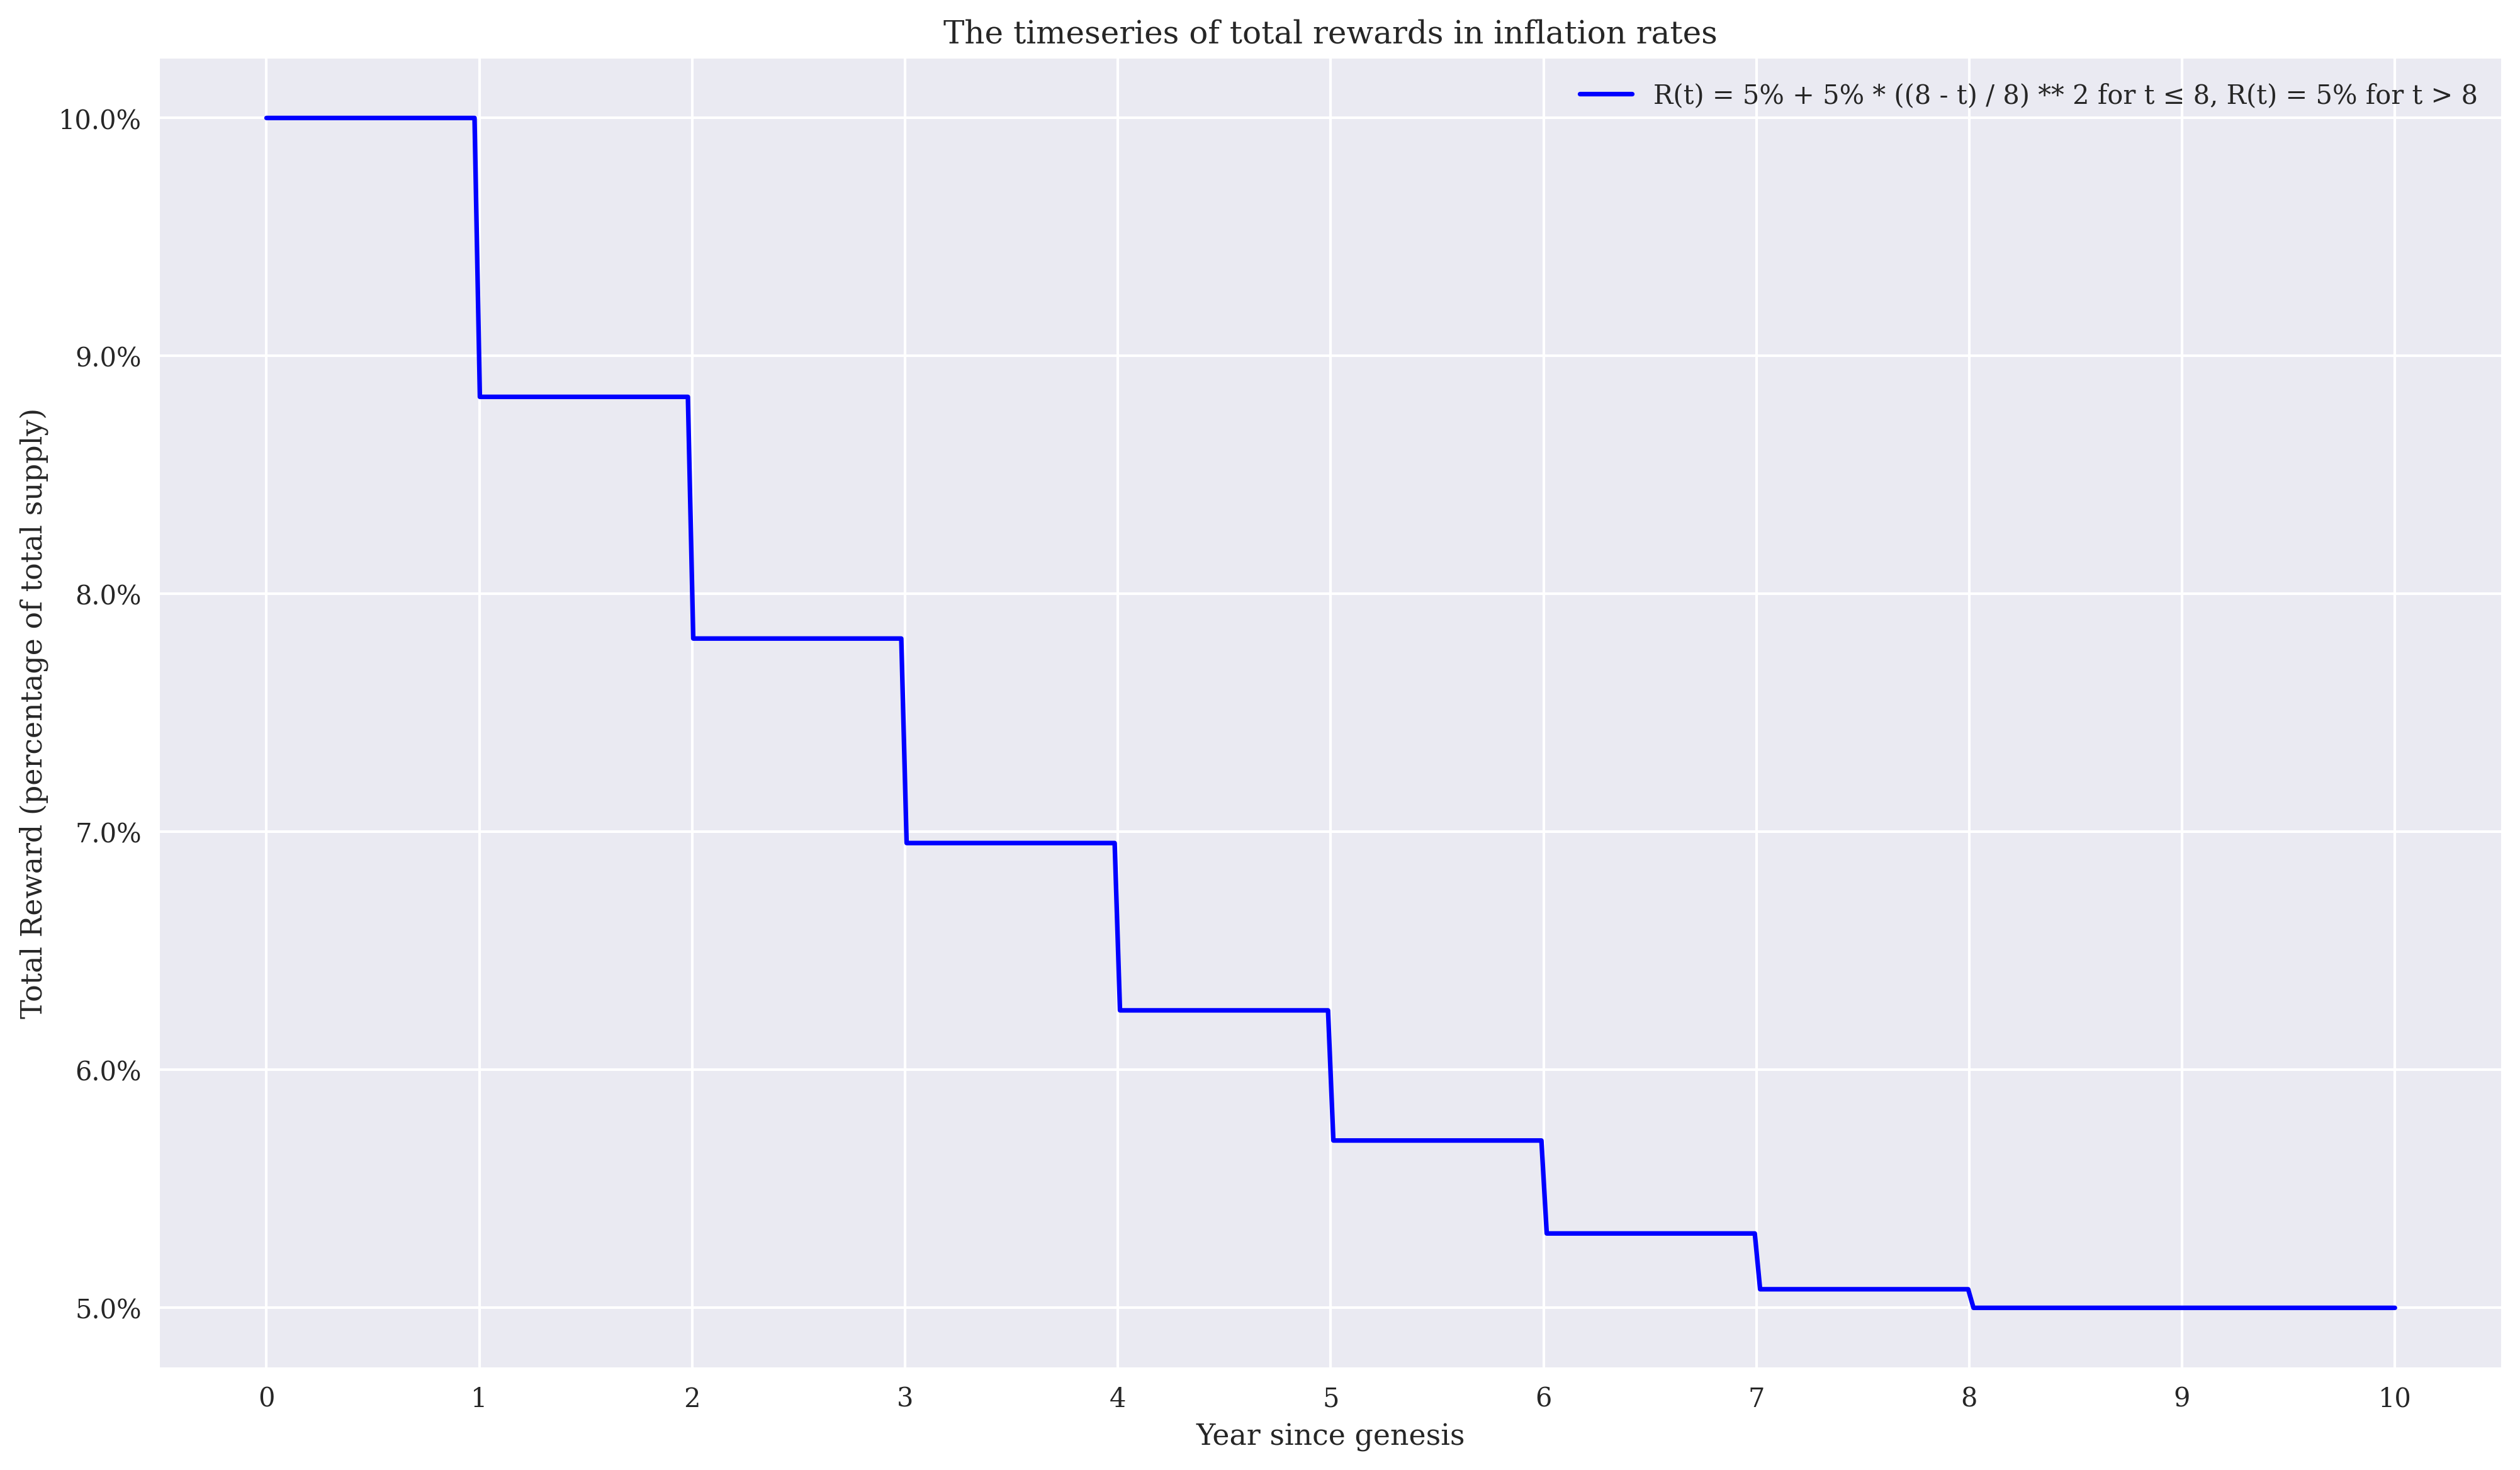

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import PercentFormatter

# Set the style to 'seaborn'
plt.style.use('seaborn')

# Define the aspect ratio and resolution
width = 16  # Width of the figure
height = 9  # Height of the figure
dpi = 300  # Dots per inch, for high resolution

# Set the font to 'Computer Modern'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern'] + plt.rcParams['font.serif']

# Create a new figure with the specified size
fig = plt.figure(figsize=(width, height), dpi=dpi)

def R(t):
    # Check if the input is an integer and at least 1
    if not isinstance(t, int) or t < 0:
        return "Error: the input must be an integer at least as large as 1"

    # If t is larger than 8, return 0.05
    if t > 8:
        return 0.05

    # Otherwise, compute the function value
    return 0.05 + 0.05 * ((8 - t) / 8) ** 2

# Generate values for t from 0 to 10 to demonstrate the function behavior
t_values = np.linspace(0, 10, 400)
R_values = [R(int(t)) if isinstance(R(int(t)), float) else np.nan for t in t_values]

# Plotting the function
plt.plot(t_values, R_values, label='R(t) = 5% + 5% * ((8 - t) / 8) ** 2 for t ≤ 8, R(t) = 5% for t > 8', color='blue')
plt.xlabel('Year since genesis')
plt.ylabel('Total Reward (percentage of total supply)')
plt.title('The timeseries of total rewards in inflation rates')
plt.legend()
plt.grid(True)

# Set x-ticks for each integer value
plt.xticks(np.arange(0, 11, 1))


# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Save the figure in high resolution
fig.savefig("total_reward.png", dpi=dpi)

# Display the plot
plt.show()


<ipython-input-151-3b17de26712d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


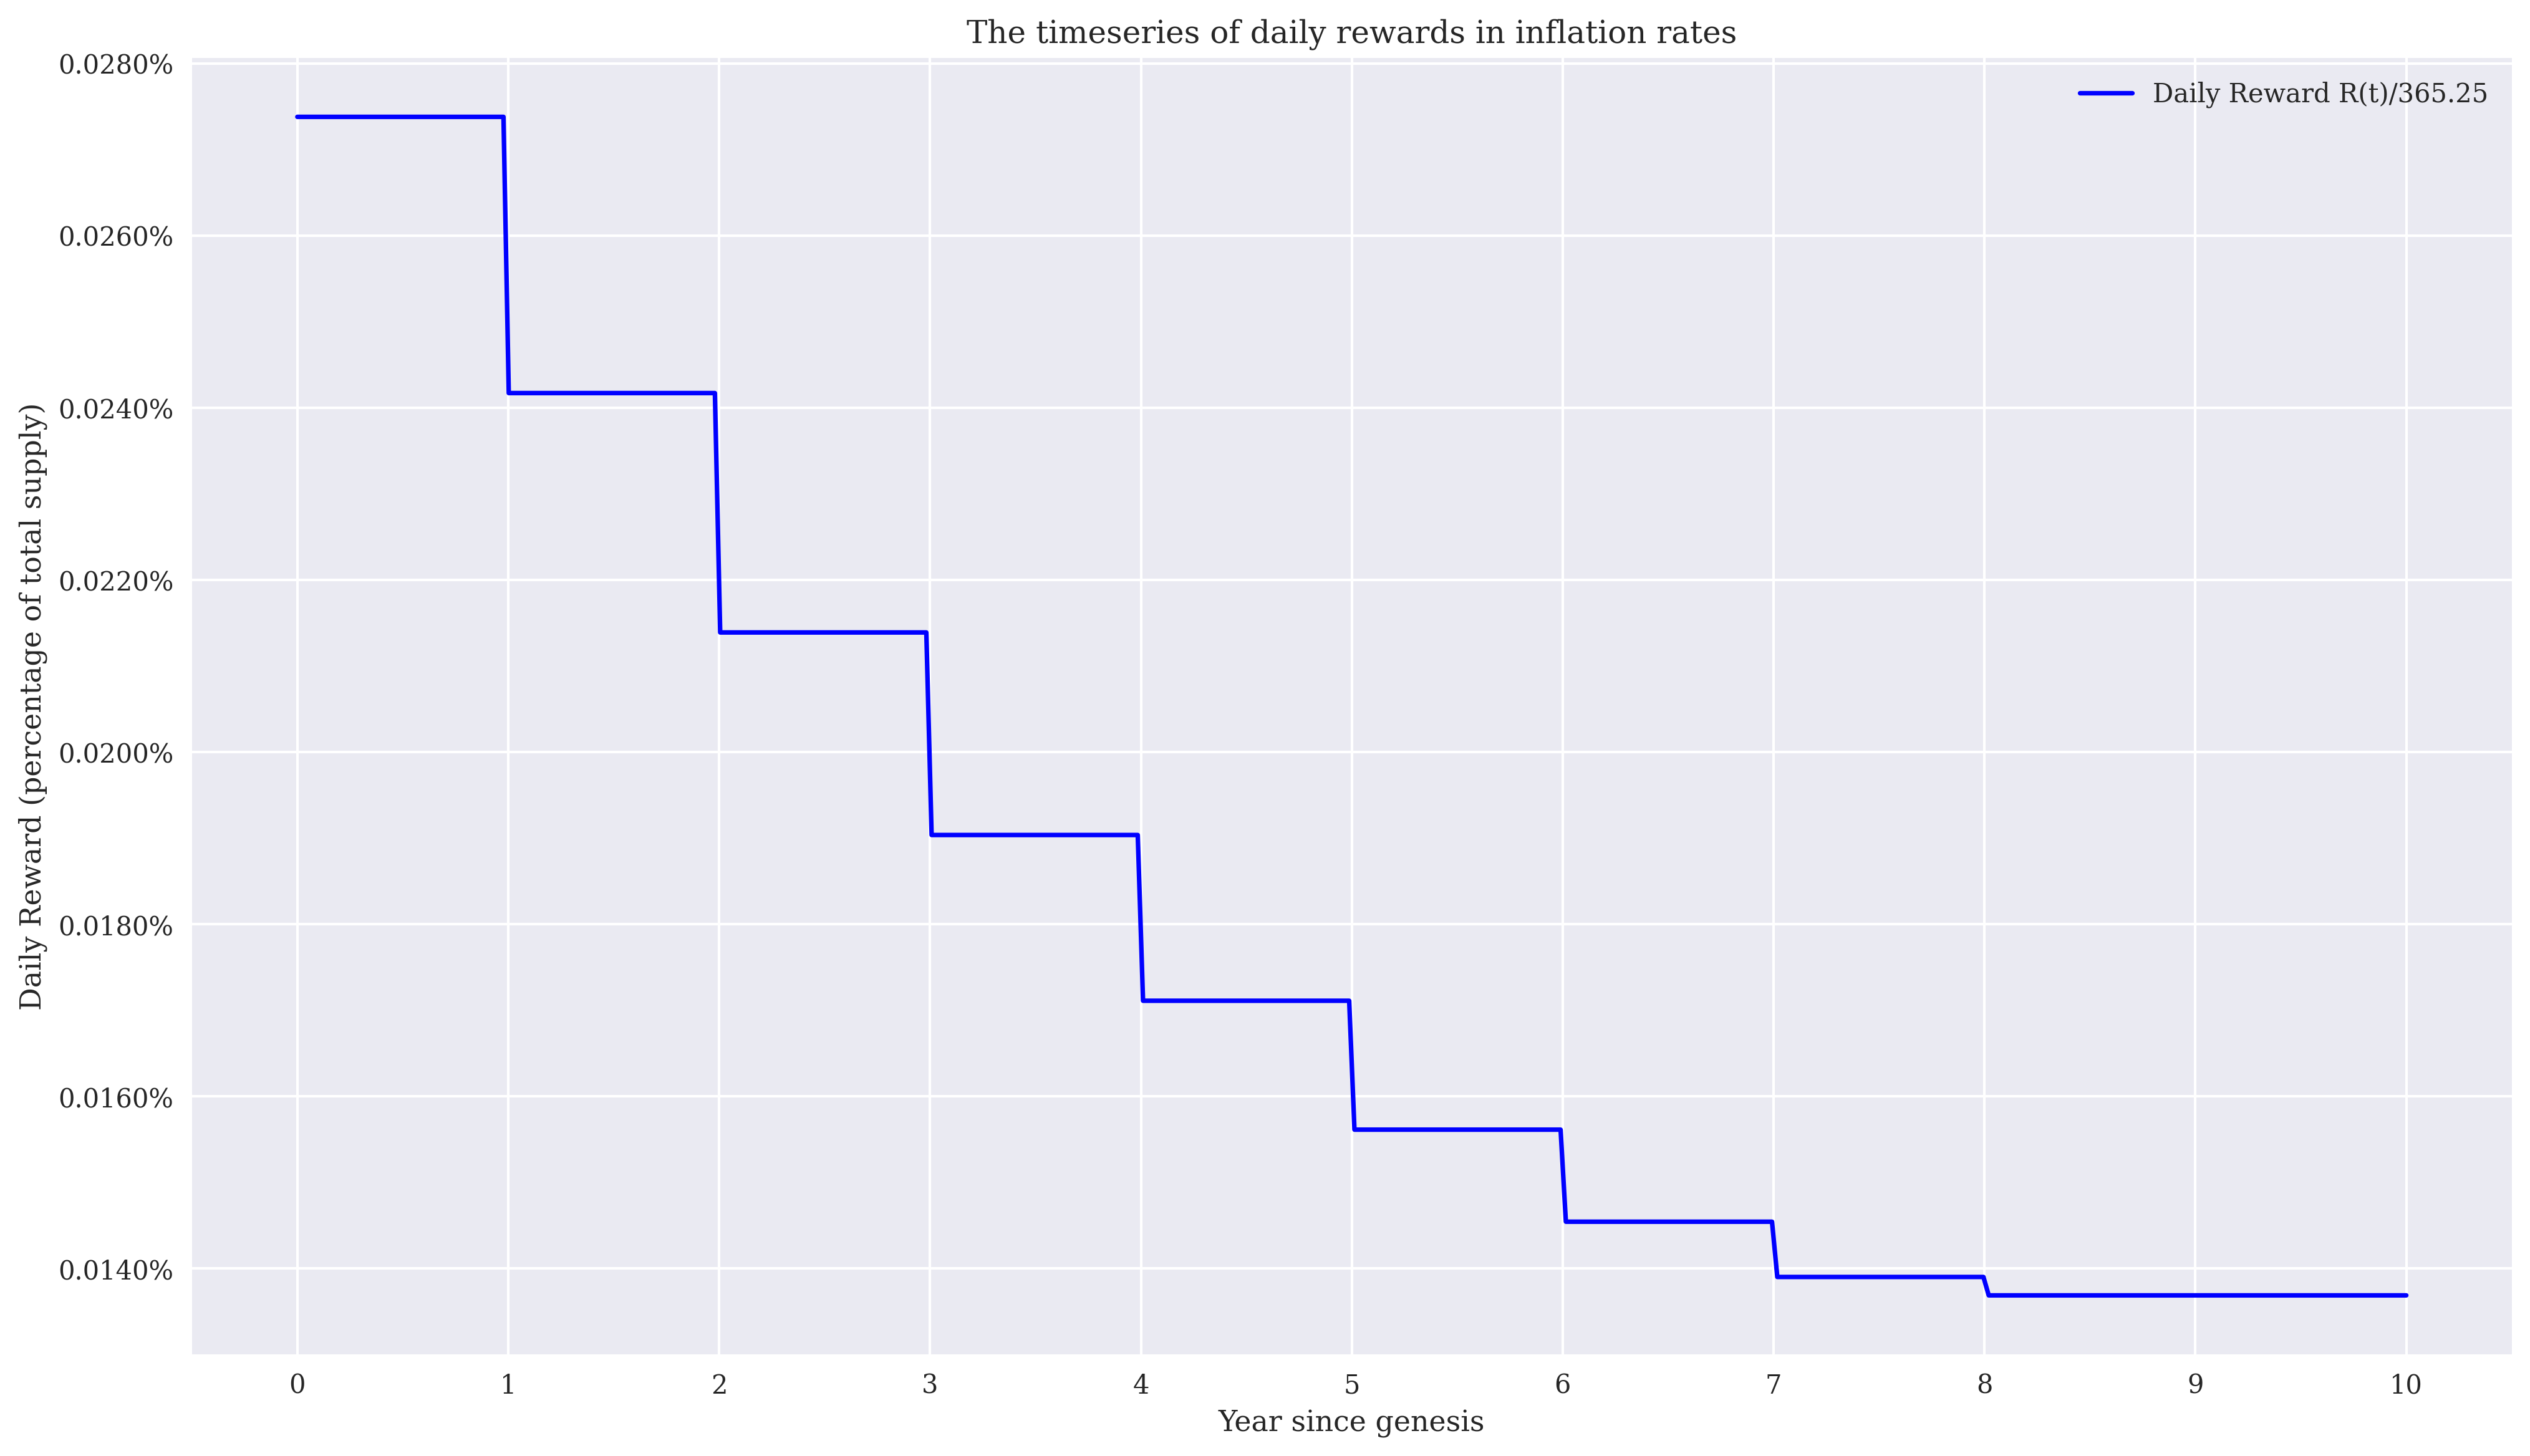

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import PercentFormatter

# Set the style to 'seaborn'
plt.style.use('seaborn')

# Define the aspect ratio and resolution
width = 16  # Width of the figure
height = 9  # Height of the figure
dpi = 300  # Dots per inch, for high resolution

# Set the font to 'Computer Modern'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern'] + plt.rcParams['font.serif']

# Create a new figure with the specified size
fig = plt.figure(figsize=(width, height), dpi=dpi)

def R(t):
    # Check if the input is an integer and at least 1
    if not isinstance(t, int) or t < 0:
        return "Error: the input must be an integer at least as large as 1"

    # If t is larger than 8, return 0.05
    if t > 8:
        return 0.05

    # Otherwise, compute the function value
    return 0.05 + 0.05 * ((8 - t) / 8) ** 2

# Generate values for t from 0 to 10 to demonstrate the function behavior
t_values = np.linspace(0, 10, 400)
R_values = [(R(int(t))/365.25) if isinstance(R(int(t)), float) else np.nan for t in t_values]

# Plotting the function
plt.plot(t_values, R_values, label='Daily Reward R(t)/365.25', color='blue')
plt.xlabel('Year since genesis')
plt.ylabel('Daily Reward (percentage of total supply)')
plt.title('The timeseries of daily rewards in inflation rates')
plt.legend()
plt.grid(True)

# Set x-ticks for each integer value
plt.xticks(np.arange(0, 11, 1))


# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Save the figure in high resolution
fig.savefig("total_reward.png", dpi=dpi)

# Display the plot
plt.show()




REFERENCES:

https://internetcomputer.org/docs/current/tokenomics/nns/nns-staking-voting-rewards

https://dashboard.internetcomputer.org/circulation


# Part 2.2. Voting Reward Share by Each Neuron

In [140]:
# @title Neuron Stake
staked_ICP = 60 # @param {type:"number"}
staked_maturity = 40 # @param {type:"number"}

neuron_stake = staked_ICP + staked_maturity #neuron stake

print(f"The neuron stake is {neuron_stake} ICP as the total of {staked_ICP} staked ICP and {staked_maturity} maturity staked")


The neuron stake is 100 ICP as the total of 60 staked ICP and 40 maturity staked


In [144]:
def print_multipliers_decorator(func):
    def wrapper(x_age, x_duration):
        m_duration = multiplier_duration(x_duration)
        m_age = Multiplier_Age(x_age)
        m = func(x_age, x_duration)

        print(f'The voting power multiplier of dissolve delay {x_duration} month is {m_duration}')
        print(f'The voting power multiplier of age {x_age} month is {m_age}')
        print(f'The voting power multiplier of combined multiplier of {x_duration} and {x_age} month is {m}')
        return m
    return wrapper

# Assuming the definitions of Multiplier_Age and multiplier_duration are provided elsewhere

@print_multipliers_decorator
def combined_multiplier(x_age, x_duration):
    # Ensure age is always less than duration
    if x_age > x_duration:
        return "Error: age shall be smaller than the dissolve delay"

    age_multiplier = Multiplier_Age(x_age)
    duration_multiplier = multiplier_duration(x_duration)

    if isinstance(age_multiplier, str) or isinstance(duration_multiplier, str):
        # Handle cases where one or both multipliers are out of range or other non-numeric values
        return "Input out of range"
    else:
        return age_multiplier * duration_multiplier

# Example usage:
combined_multiplier(4, 6)


The voting power multiplier of dissolve delay 6 month is 1.06
The voting power multiplier of age 4 month is 1.0208333333333333
The voting power multiplier of combined multiplier of 6 and 4 month is 1.0820833333333333


1.0820833333333333

In [149]:
# @title Neuron Voting Power
dissolve_delay_month = 96 # @param {type:"number"}
age_month = 48 # @param {type:"number"}
neuron_stake = 100 # @param {type:"number"}
m=combined_multiplier(age_month, dissolve_delay_month)
voting_power = m * neuron_stake
print(f'The voting power of the neuron is {voting_power}')


The voting power multiplier of dissolve delay 96 month is 2.0
The voting power multiplier of age 48 month is 1.25
The voting power multiplier of combined multiplier of 96 and 48 month is 2.5
The voting power of the neuron is 250.0


In [174]:
# @title Neuron Rewards Per Proposal Share as Voting Weights
neuron_voting_power = 250 # @param {type:"number"}
total_voting_power = 500 # @param {type:"number"}

voting_weight = neuron_voting_power / total_voting_power
voting_weight_percentage = neuron_voting_power / total_voting_power * 100  # Convert to percentage
print(f'The voting weight of the neuron is {voting_weight_percentage:.2f}%')


The voting weight of the neuron is 50.00%


In [170]:
# @title Current Daily Reward
year_since_genesis = 2 # @param {type:"number"}

def daily_decorator(func):
    def wrapper(t):
        result = func(t)
        if isinstance(result, float):  # Ensure the result is numeric before dividing
            return result / 365.25
        return result  # Return the original result (like error messages) if not numeric
    return wrapper

def R(t):
    # Check if the input is an integer and at least 1
    if not isinstance(t, int) or t < 0:
        return "Error: the input must be an integer at least as large as 1"

    # If t is larger than 8, return 0.05
    if t > 8:
        return 0.05

    # Otherwise, compute the function value
    return 0.05 + 0.05 * ((8 - t) / 8) ** 2

@daily_decorator
def D(t):
    return R(t)

# Example usage:
print(f"the current daily reward in inflation rate is {D(2)}")  # This will print the value of D(t) when t=2


the current daily reward in inflation rate is 0.0002138945927446954


In [176]:
# @title Neuron Rewards per Voted Proposal
voting_weight= 1 # @param {type:"number"}
proposal_reward_weight_daily = 0.5 # @param {type:"number"}
current_daily_reward_rate = 0.0002138945927446954 # @param {type:"number"}
current_total_supply = 1000 # @param {type:"number"}
neuron_reward_per_voted_proposal = voting_weight * proposal_reward_weight_daily * current_daily_reward_rate* current_total_supply
print(f'The neuron reward per voted proposal is {neuron_reward_per_voted_proposal} ICP' )


The neuron reward per voted proposal is 0.1069472963723477 ICP


**Inflationary and deflationary mechanisms**
- Deflationary mechanisms:
  - Minting cycles to pay for compute and storage burns ICP to create cycles
  - Burning of transaction fees.
  - Burning of the fee for failed proposals of neurons; note that this only happens at disbursement or merging of neurons, so accumulated fees can persist for a while before finally contributing to deflation.
- Inflationary mechanisms:
  - Node providers are paid by minting ICP.
  - Voting rewards, once spawned and converted to ICP.

Here are some examples of APIs and tools that can be used to access neuron delegation data on the NNS (Neural Nervous System) of the Internet Computer:

DFINITY Ledger Canister API:

The ledger canister contains all neuron information.
To query delegation data, call the list_neurons() method.
API reference: https://smartcontracts.org/docs/interface-spec/index.html#ic-ledger-canister
Example endpoint: https://<IC_NETWORK_ID>.ic0.app/api/v2/canister/<CANISTER_ID>/list_neurons
DFINITY Dashboard API:

The NNS dashboard exposes an API for aggregated data.
The /api/v1/nodes endpoint returns delegation stats.
API docs: https://dashboard.internetcomputer.org/docs/#tag/Neurons
Endpoint: https://dashboard.internetcomputer.org/api/v1/nodes
DFINITY Explorer API:

The block explorer has a GraphQL API.
The "neuron" query returns delegation details.
API explorer: https://dfinity-explorer.ic0.app/graphiql
Example neuron query: https://dfinity-explorer.ic0.app/graphiql?query=query%20neuron($id%3A%20String!)%20%7B%0A%20%20neuron(id%3A%20$id)%20%7B%0A%20%20%20%20id%0A%20%20%20%20delegators%0A%20%20%20%20delegatee%0A%20%20%7D%0A%7D%0A
So in summary, the DFINITY-provided ledger API, dashboard API, and community explorer APIs allow programmatic access to raw and aggregated NNS delegation data.